# Assignment: EDA

In [2]:
import zipfile
with zipfile.ZipFile("Customer_Churn.zip","r") as zip_ref:
    zip_ref.extractall("EDA Assignment")

#### In the previous project, you have learnt how to perform Exploratory Data Analysis (EDA). We used the customer churn dataset                                                                                                                                                                                                                                       and walked you through various EDA methods. Now, its your turn to start your exploration journey.


Here, we are providing you the NYC-trip duration dataset. 

The aim of this assignment is just to explore the dataset and generate insights from it. 

Here is the description of all the variables / features available in the dataset which will help you to perform EDA:

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor 
because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)

**trip_duration - (target) duration of the trip in seconds**

You can download the dataset from the link given below and perform the EDA on this dataset. Once you have finished the EDA, submit the jupyter notebook and we will evaluate it.

## List of hypothesis
Will focus mainly on these hypothesis

**1. Count of passengers who travelled in the vehicle on different days/hrs?**

**2. At what time did the trip start?**

**3. On which date the trip started?**

**4. What day of week was trip started?**

**5. Was the trip duration made during morning hrs?**

**6. Was the trip duration made during evenging hrs?**

**7. Was the trip duration made during afternoon hrs?**

**8. What was the distance between the location pickup and dropoff?**

**9. Was the trip in high density area?**

**10. Was the trip in low density area?**

**11. Are weekends tend to have less trip duration due to less congestion?**

**12. At what time did the trip ended?**

**13. On which date the trip ended?**

**14. What was the speed of taxi during the holidays?**

**15. What was the speed of taxi during the working days?**

**16. Who provided more trip durations vendor 1 or 2?**

**17. What is the total distance covered in 1 month?**

**18. What is the total distance covered in 6 months?**

**19. What is the total trips/distance covered in 1yr?**

#### Reading Files into Python

In [2]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import pylab as py 

In [3]:
#importing data
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
#first 5 instances using "head()" function
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
#last 5 instances using "tail()" function
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [5]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(729322, 11)

In [6]:
#Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


# 1. Variable Identification and Typecasting


In [8]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object


*    **vendor_id** represents a codes  assigned to diferent providers(here 1/2).Therefore it should be **convereted to category**.

*    **passenger_count** and **trip_duration** are numbers and hence we are okay it as integers.


In [10]:
# converting vendor_id to category
data['vendor_id'] = data['vendor_id'].astype('category')
data.dtypes[data.dtypes == 'int64']

passenger_count    int64
trip_duration      int64
dtype: object

In [11]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object


*    **pickup_longitude**, **pickup_latitude**,**dropoff_longitude** and **dropoff_latitude** are best represented by the float variables.

In [12]:
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

* variables like **id**,**pickup_datetime**,**dropoff_datetime** and **store_and_fwd_flag** are of type object. This means that Pandas was not able to recognise the datatype of these three variables.
*    So here **id** and **store_and_fwd_flag** variables **belong to categorical data types**.
*    **pickup_datetime** and **dropoff_datetime** should be a  **datetime variable**.

In [13]:
# Typecasting to category datatype
data['id'] = data['id'].astype('category')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')
# checking
data[['id','store_and_fwd_flag']].dtypes

id                    category
store_and_fwd_flag    category
dtype: object

In [14]:
data.dtypes[data.dtypes == 'category']

id                    category
vendor_id             category
store_and_fwd_flag    category
dtype: object

### Datetime  datatype

In [15]:
#Typecasting to datetime datatype
# extracting new columns from "pickup_datetime" and "dropoff_datetime"
# start day and end day
data['day_start'] = pd.to_datetime(data['pickup_datetime']).dt.day
data['day_end'] = pd.to_datetime(data['dropoff_datetime']).dt.day
#start month and end month
data['month_start'] = pd.to_datetime(data['pickup_datetime']).dt.month
data['month_end'] = pd.to_datetime(data['dropoff_datetime']).dt.month

#start date and end date
data['date_pickup'] = pd.to_datetime(data['pickup_datetime']).dt.date
data['date_dropoff'] = pd.to_datetime(data['dropoff_datetime']).dt.date

#Start Hour and end hour
data['Hour_pickup'] = pd.to_datetime(data['pickup_datetime']).dt.hour
data['Hour_dropoff'] = pd.to_datetime(data['dropoff_datetime']).dt.hour

#week day
data['trip_dayofweek'] = pd.to_datetime(data['pickup_datetime']).dt.dayofweek
mapping_day = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Satuday',6:'Sunday'}
data['trip_dayofweek'] = data['trip_dayofweek'].map(mapping_day).astype('category')

In [16]:
#Difference b/w pickup_time and drop_time 
data['time difference'] = ((pd.to_datetime(data['dropoff_datetime']) - 
                            pd.to_datetime(data['pickup_datetime']))
                                .dt.total_seconds() / 60)

In [17]:
#Type casting to datetime
data['pickup_datetime'] = data['pickup_datetime'].astype('datetime64')
data['dropoff_datetime'] = data['dropoff_datetime'].astype('datetime64')
data['date_pickup'] = data['date_pickup'].astype('datetime64')
data['date_dropoff'] = data['date_dropoff'].astype('datetime64')

In [18]:
#function to speify the time hrs
def func_hrs(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [19]:
#calling function
data['Starting_Hrs'] = data['Hour_pickup'].apply(func_hrs).astype('category')
data['End_Hrs'] = data['Hour_dropoff'].apply(func_hrs).astype('category')

In [20]:
!pip install geopy 

In [21]:
from geopy.distance import geodesic 
import geopy

In [22]:
#To calculate distance(in km) between pickup and dropoff points using geopy lib

def geo_dist(lat1, long1, lat2, long2):
    coords_1 = (lat1, long1)
    coords_2 = (lat2, long2)
    return geopy.distance.geodesic(coords_1,coords_2).km
list_dist = []

for ind in data.index:

    list_dist.append(geo_dist(data['pickup_latitude'][ind], data['pickup_longitude'][ind], data['dropoff_latitude'][ind], data['dropoff_longitude'][ind]))



data['distance_in_Km'] = pd.DataFrame(list_dist)

In [23]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,month_end,date_pickup,date_dropoff,Hour_pickup,Hour_dropoff,trip_dayofweek,time difference,Starting_Hrs,End_Hrs,distance_in_Km
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,2,2016-02-29,2016-02-29,16,16,Monday,6.666667,Noon,Noon,1.199770
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,3,2016-03-11,2016-03-11,23,23,Friday,18.333333,Night,Night,4.123945
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,2,2016-02-21,2016-02-21,17,18,Sunday,27.250000,Eve,Eve,7.250436
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,2016-01-05,2016-01-05,9,10,Tuesday,19.016667,Morning,Morning,2.358287
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,2016-02-17,2016-02-17,6,6,Wednesday,14.133333,Early Morning,Early Morning,4.328155


In [24]:
#speed of taxi in km/hr
data['speed of taxi km/hr'] = data['distance_in_Km'] / (data['trip_duration']/3600)

In [25]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,date_pickup,date_dropoff,Hour_pickup,Hour_dropoff,trip_dayofweek,time difference,Starting_Hrs,End_Hrs,distance_in_Km,speed of taxi km/hr
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,2016-02-29,2016-02-29,16,16,Monday,6.666667,Noon,Noon,1.199770,10.797929
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,2016-03-11,2016-03-11,23,23,Friday,18.333333,Night,Night,4.123945,13.496548
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,2016-02-21,2016-02-21,17,18,Sunday,27.250000,Eve,Eve,7.250436,15.964262
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,2016-01-05,2016-01-05,9,10,Tuesday,19.016667,Morning,Morning,2.358287,7.440694
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2016-02-17,2016-02-17,6,6,Wednesday,14.133333,Early Morning,Early Morning,4.328155,18.374244


In [26]:
data.dtypes

id                           category
vendor_id                    category
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag           category
trip_duration                   int64
day_start                       int64
day_end                         int64
month_start                     int64
month_end                       int64
date_pickup            datetime64[ns]
date_dropoff           datetime64[ns]
Hour_pickup                     int64
Hour_dropoff                    int64
trip_dayofweek               category
time difference               float64
Starting_Hrs                 category
End_Hrs                      category
distance_in_Km                float64
speed of taxi km/hr           float64
dtype: object

# Min, Max and Range of Data

In [27]:
## Isolating numerical columns
# storing indices of all numerical data types in numerical_cols
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# checking
numerical_cols

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'day_start',
       'day_end', 'month_start', 'month_end', 'Hour_pickup', 'Hour_dropoff',
       'time difference', 'distance_in_Km', 'speed of taxi km/hr'],
      dtype='object')

In [28]:
# observation with minimum distance_in_km
data[data['trip_duration'] == data['trip_duration'].min()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,date_pickup,date_dropoff,Hour_pickup,Hour_dropoff,trip_dayofweek,time difference,Starting_Hrs,End_Hrs,distance_in_Km,speed of taxi km/hr
70318,id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,...,2016-04-11,2016-04-11,19,19,Monday,0.016667,Eve,Eve,0.133260,479.734408
95823,id2943073,2,2016-01-03 16:55:44,2016-01-03 16:55:45,1,-73.975677,40.785488,-73.976372,40.785831,N,...,2016-01-03,2016-01-03,16,16,Sunday,0.016667,Noon,Noon,0.069912,251.684858
102646,id2536510,1,2016-04-17 11:44:49,2016-04-17 11:44:50,1,-73.940384,40.786423,-73.940300,40.786373,N,...,2016-04-17,2016-04-17,11,11,Sunday,0.016667,Morning,Morning,0.008973,32.301052
119181,id2517984,1,2016-01-09 00:28:55,2016-01-09 00:28:56,1,-73.861961,40.768559,-73.861961,40.768559,N,...,2016-01-09,2016-01-09,0,0,Satuday,0.016667,Late Night,Late Night,0.000000,0.000000
296874,id1520236,1,2016-05-17 09:03:38,2016-05-17 09:03:39,1,-73.819893,40.740822,-73.819885,40.740822,N,...,2016-05-17,2016-05-17,9,9,Tuesday,0.016667,Morning,Morning,0.000644,2.319870
312992,id0075470,1,2016-03-07 16:12:28,2016-03-07 16:12:29,1,-73.980690,40.744419,-73.980690,40.744419,N,...,2016-03-07,2016-03-07,16,16,Monday,0.016667,Noon,Noon,0.000000,0.000000
323299,id0578509,1,2016-02-03 12:35:22,2016-02-03 12:35:23,1,-73.980560,40.754829,-73.980560,40.754829,N,...,2016-02-03,2016-02-03,12,12,Wednesday,0.016667,Morning,Morning,0.000000,0.000000
398887,id2402793,1,2016-04-30 00:28:45,2016-04-30 00:28:46,1,-73.789658,40.647003,-73.789658,40.647003,N,...,2016-04-30,2016-04-30,0,0,Satuday,0.016667,Late Night,Late Night,0.000000,0.000000
512833,id2697717,2,2016-03-27 12:55:52,2016-03-27 12:55:53,2,-73.983154,40.767159,-73.983238,40.767097,N,...,2016-03-27,2016-03-27,12,12,Sunday,0.016667,Morning,Morning,0.009805,35.299702
533760,id0948644,2,2016-02-22 00:40:25,2016-02-22 00:40:26,0,-73.987595,40.719997,-73.987595,40.720005,N,...,2016-02-22,2016-02-22,0,0,Monday,0.016667,Late Night,Late Night,0.000847,3.050038


* **13 rows** have minimum trip duration of 1.000000s


In [29]:
# observation with maximum distance_in_km
data[data['trip_duration'] == data['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,date_pickup,date_dropoff,Hour_pickup,Hour_dropoff,trip_dayofweek,time difference,Starting_Hrs,End_Hrs,distance_in_Km,speed of taxi km/hr
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,...,2016-01-05,2016-01-27,0,11,Tuesday,32328.933333,Late Night,Morning,20.160235,0.037416


*  **id1864733** travelled max duration.
* maximum trip duration is 1.939736e+06

### Max, Min, Range for each column

In [30]:
# Printing Max of evey numerical column
data[numerical_cols].max()

passenger_count        9.000000e+00
pickup_longitude      -6.589738e+01
pickup_latitude        5.188108e+01
dropoff_longitude     -6.589738e+01
dropoff_latitude       4.392103e+01
trip_duration          1.939736e+06
day_start              3.100000e+01
day_end                3.100000e+01
month_start            6.000000e+00
month_end              7.000000e+00
Hour_pickup            2.300000e+01
Hour_dropoff           2.300000e+01
time difference        3.232893e+04
distance_in_Km         1.240510e+03
speed of taxi km/hr    5.638683e+03
dtype: float64

* max **trip_duration** is 1.939736e+06 s
*  **id2306955** travelled max distance.
* maximum distance covered__ is  1240.510256
* max **passenger_count** is 9
* max **speed** used is 5638.682980 km/hr

In [31]:
# printing min of every numercial column
data[numerical_cols].min()

passenger_count          0.000000
pickup_longitude      -121.933342
pickup_latitude         34.712234
dropoff_longitude     -121.933304
dropoff_latitude        32.181141
trip_duration            1.000000
day_start                1.000000
day_end                  1.000000
month_start              1.000000
month_end                1.000000
Hour_pickup              0.000000
Hour_dropoff             0.000000
time difference          0.016667
distance_in_Km           0.000000
speed of taxi km/hr      0.000000
dtype: float64

* min **trip_duration** is  1.000000 s
* minimum distance covered__ is 0.0
* min **passenger_count** is 0
* min **speed** used is 0.0 km/hr

In [32]:
for col in numerical_cols:
    print("range of {}{}{}{}{}{}{}{}".format(col,":"," ","[",data[col].min(), ", ",data[col].max(),"]"))

range of passenger_count: [0, 9]
range of pickup_longitude: [-121.93334197998048, -65.89738464355469]
range of pickup_latitude: [34.71223449707032, 51.88108444213867]
range of dropoff_longitude: [-121.9333038330078, -65.89738464355469]
range of dropoff_latitude: [32.1811408996582, 43.92102813720703]
range of trip_duration: [1, 1939736]
range of day_start: [1, 31]
range of day_end: [1, 31]
range of month_start: [1, 6]
range of month_end: [1, 7]
range of Hour_pickup: [0, 23]
range of Hour_dropoff: [0, 23]
range of time difference: [0.016666666666666666, 32328.933333333338]
range of distance_in_Km: [0.0, 1240.5102556291924]
range of speed of taxi km/hr: [0.0, 5638.682980132693]


* range of passengers travellevd from 0 to 9
* range of trip_duration: [1, 1939736] s
* So taxi trip happens for full month as range is from 1st till 31st day of a month.
* So trip starts around [January, June ] range
* So trip ends around [January,July] range
* Both starting and ending trip time is for 0 to 23 hrs only.
* range of distance_in_Km: [0.0, 1240.5102556291924]
* range of speed of taxi km/hr: [0.0, 5638.682980132693]





### Mean Value

In [33]:
#mean of passengers
print(data['trip_duration'].mean())
#current trip duration of customers who may travel on monday
print(data[data['distance_in_Km']>0]['trip_duration'].mean())
print(data[data['passenger_count']>0]['trip_duration'].mean())

952.2291333594764
953.9365533210081
952.2539418529554


* Trip duration for diff distance covered is 953.9365533210081
* Trip duration for count of passengers is 952.2539418529554

In [34]:
#median of trip_duration
data['trip_duration'].median()

663.0

*  __Median__ of trip duration is 663. 
* That means 663 is the __50th percentile__ of the trip duration of NYC taxi.

In [35]:
print(data[data['distance_in_Km']>0]['trip_duration'].median())
print(data[data['passenger_count']>0]['trip_duration'].median())

664.0
663.0


### Describe Function

In [36]:
data.describe(include=[int, float])

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_start,day_end,month_start,month_end,Hour_pickup,Hour_dropoff,time difference,distance_in_Km,speed of taxi km/hr
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.00000,729322.000000,729322.000000,729322.000000
mean,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,15.502088,15.502587,3.518410,3.518764,13.611698,13.60616,15.870486,3.442464,14.424310
std,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,8.699772,8.699714,1.680661,1.680815,6.402853,6.48637,64.410437,4.356668,12.343552
min,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.016667,0.000000,0.000000
25%,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,8.000000,8.000000,2.000000,2.000000,9.000000,9.00000,6.616667,1.233153,9.127319
50%,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,15.000000,15.000000,4.000000,4.000000,14.000000,14.00000,11.050000,2.096073,12.799458
75%,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,23.000000,23.000000,5.000000,5.000000,19.000000,19.00000,17.916667,3.875828,17.844018
max,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,31.000000,31.000000,6.000000,7.000000,23.000000,23.00000,32328.933333,1240.510256,5638.682980


In [37]:
print(data['trip_duration'].std())
print(data['trip_duration'].var())

3864.626197281119
14935335.64471152


*  __standard deviation__  for trip_duration of the NYC taxi is 3864.626197281119
*  __variance__ for trip duration of the NYC taxi is 14935335.64471152

## Missing Values

In [38]:
#checking missing values
data.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
day_start              0
day_end                0
month_start            0
month_end              0
date_pickup            0
date_dropoff           0
Hour_pickup            0
Hour_dropoff           0
trip_dayofweek         0
time difference        0
Starting_Hrs           0
End_Hrs                0
distance_in_Km         0
speed of taxi km/hr    0
dtype: int64

* No missing values in the given dataset

### Exploring continuous variable

**Distributions of variable with avg trip duration**

<AxesSubplot:ylabel='Frequency'>

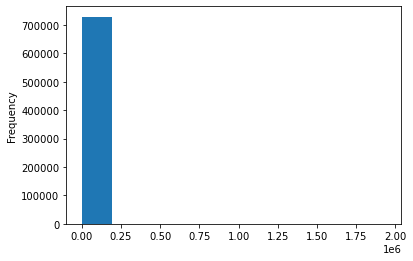

In [39]:
#distribution of target variable slide eda 863
data['trip_duration'].plot.hist()

In [40]:
#Distribution of trip duration for the number of passengers who travelled
trip_duration_num_passenger = data[data['passenger_count']>0]['trip_duration']

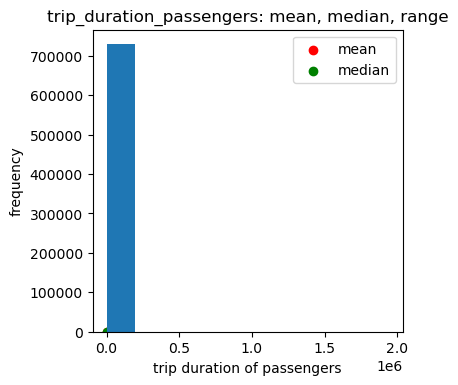

In [41]:
# setting image resolution
plt.figure(figsize = (4,4), dpi = 100)

# Plotting histogram and descriptive summary
plt.scatter(trip_duration_num_passenger.mean(), 0, label = 'mean', color = 'red')
plt.scatter(trip_duration_num_passenger.median(), 0, label = 'median', color = 'green')
plt.hist(trip_duration_num_passenger,bins=10)

# axes labels
plt.xlabel('trip duration of passengers')
plt.ylabel('frequency')
plt.title('trip_duration_passengers: mean, median, range')
plt.legend()

* Mean Value is higher than the Median Value

In [42]:
#Distribution of trip duration and distance covered
trip_duration_dist = data[data['distance_in_Km']>0]['trip_duration']

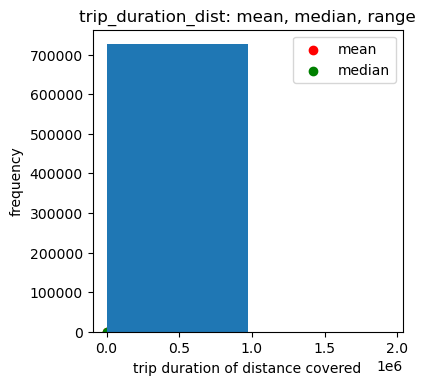

In [43]:
# setting image resolution
plt.figure(figsize = (4,4), dpi = 100)

# Plotting histogram and descriptive summary
plt.scatter(trip_duration_dist.mean(), 0, label = 'mean', color = 'red')
plt.scatter(trip_duration_dist.median(), 0, label = 'median', color = 'green')
plt.hist(trip_duration_dist ,bins=2)
# axes labels
plt.xlabel('trip duration of distance covered')
plt.ylabel('frequency')
plt.title('trip_duration_dist: mean, median, range')
plt.legend()

* Mean Value is higher than the Median Value

<AxesSubplot:xlabel='trip_dayofweek'>

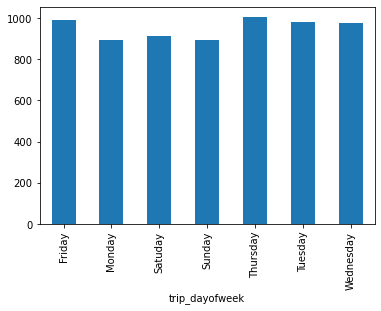

In [44]:
data.groupby('trip_dayofweek')['trip_duration'].mean().plot(kind = 'bar')

* Distribution of trip duration in different weekdays

<AxesSubplot:xlabel='Starting_Hrs'>

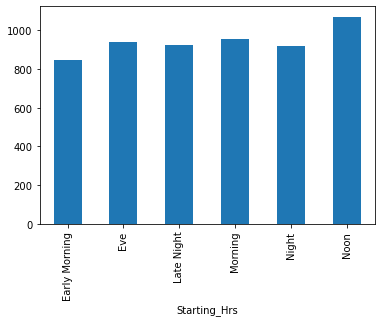

In [45]:
data.groupby('Starting_Hrs')['trip_duration'].mean().plot(kind = 'bar')

* Distribution of trip duration in different time hrs

<AxesSubplot:xlabel='store_and_fwd_flag'>

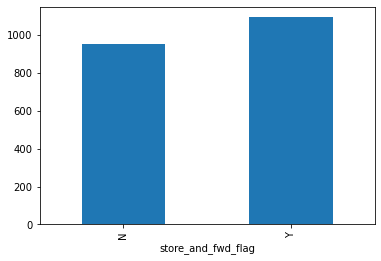

In [46]:
data.groupby('store_and_fwd_flag')['trip_duration'].mean().plot(kind = 'bar')


* Trip duration for different flags

<AxesSubplot:xlabel='vendor_id'>

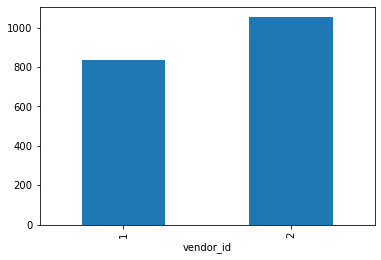

In [47]:
data.groupby('vendor_id')['trip_duration'].mean().plot(kind = 'bar')

* Trip duration provided by different vendors

<AxesSubplot:xlabel='passenger_count'>

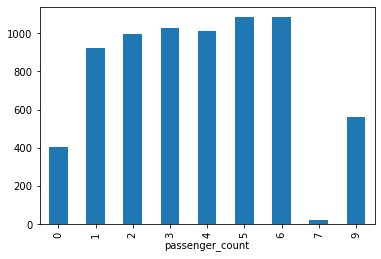

In [48]:
data.groupby('passenger_count')['trip_duration'].mean().plot(kind = 'bar')

### KDE Plots

In [49]:
# extracting age of people of who churned
pass_trip = data.groupby('passenger_count')['trip_duration'].mean()

#checking
pass_trip

passenger_count
0     403.969697
1     921.403438
2     995.422191
3    1026.482285
4    1013.849181
5    1085.312953
6    1084.088232
7      19.000000
9     560.000000
Name: trip_duration, dtype: float64

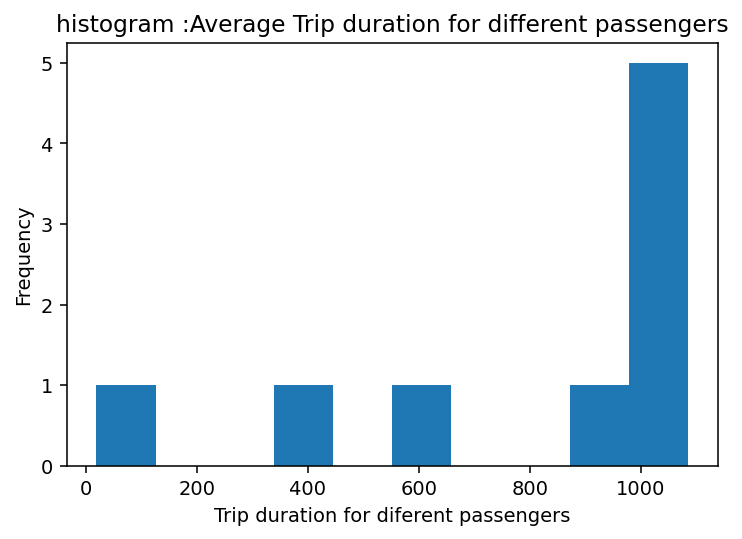

In [50]:
# plotting histogram
plt.figure(dpi = 140)
plt.hist(pass_trip,bins = 10)
plt.xlabel("Trip duration for diferent passengers")
plt.ylabel('Frequency')
plt.title("histogram :Average Trip duration for different passengers")
plt.show()

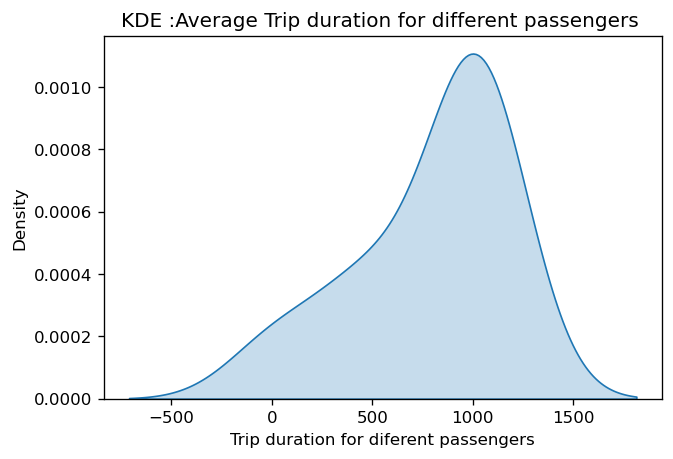

In [51]:
# plotting KdE plot using Seaborn
plt.figure(dpi = 120)
sns.kdeplot(pass_trip, shade = True)
plt.xlabel("Trip duration for diferent passengers")
plt.ylabel('Density')
plt.title("KDE :Average Trip duration for different passengers ")
plt.show()

In [52]:
# calculating points of mean, median and standard deviation
mean = pass_trip.mean()
median = pass_trip.median()
stdev = pass_trip.mean()- pass_trip.std(), pass_trip.mean()+pass_trip.std() 
#https://www.cuemath.com/data/standard-deviation/ to check figure of std
# checking
mean, median, stdev

(789.9475529828131, 995.4221909283805, (413.1924160980872, 1166.702689867539))

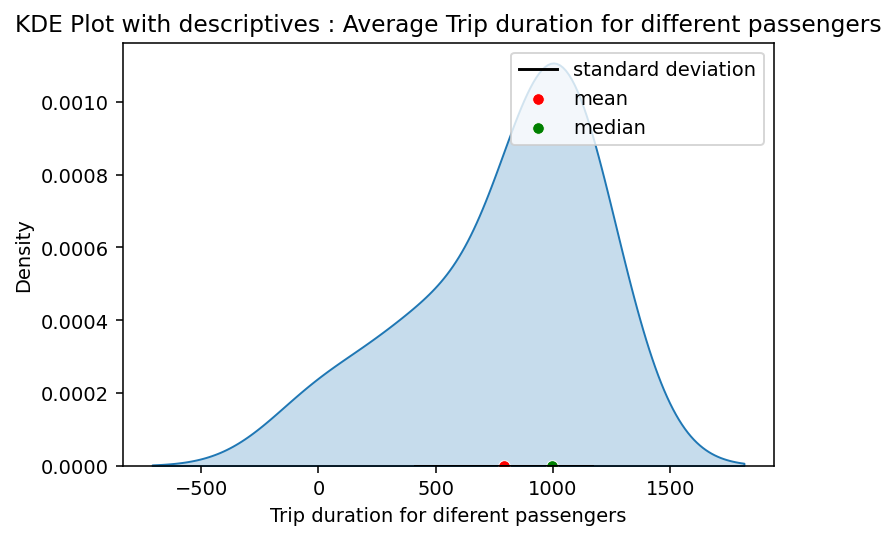

In [53]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(pass_trip, shade = True)
sns.scatterplot( [mean], [0], color='red', label='mean')
sns.scatterplot( [median], [0], color='green', label='median')
sns.lineplot( stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("Trip duration for diferent passengers")
plt.ylabel('Density')
plt.title("KDE Plot with descriptives : Average Trip duration for different passengers")
plt.show()

### Distributions of independent variables

In [54]:
## Isolating numerical columns
# storing indices of all numerical data types in numerical_cols
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# checking
numerical_cols

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'day_start',
       'day_end', 'month_start', 'month_end', 'Hour_pickup', 'Hour_dropoff',
       'time difference', 'distance_in_Km', 'speed of taxi km/hr'],
      dtype='object')

In [55]:
## Isolating numerical columns
# storing indices of all categorical data types in categorical_cols
categorical_cols = data.select_dtypes(include=['category']).columns

# checking
categorical_cols

Index(['id', 'vendor_id', 'store_and_fwd_flag', 'trip_dayofweek',
       'Starting_Hrs', 'End_Hrs'],
      dtype='object')

<AxesSubplot:xlabel='Starting_Hrs', ylabel='count'>

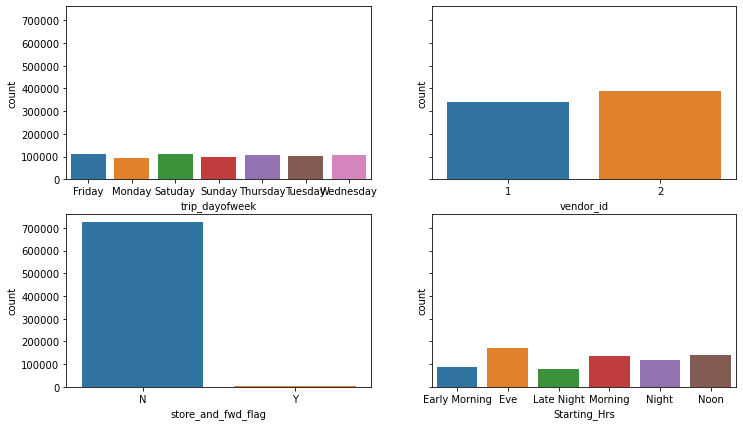

In [56]:
#Distribution of independent categorical variables
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=True)
sns.countplot("trip_dayofweek", data=data, ax=axes[0,0])
sns.countplot("vendor_id", data=data, ax=axes[0,1])
sns.countplot("store_and_fwd_flag", data=data, ax=axes[1,0])
sns.countplot("Starting_Hrs", data=data, ax=axes[1,1])

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

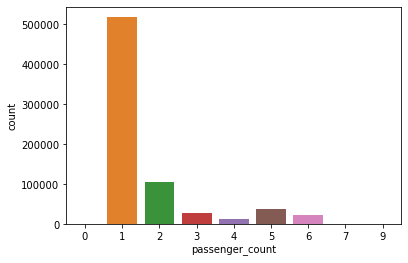

In [57]:
#Distribution of passeger count
sns.countplot("passenger_count", data=data)

In [58]:
#checking distribution of independent numerical variables
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

In [59]:
for i in numerical_cols:
  data[i] = pd.to_numeric(data[i])

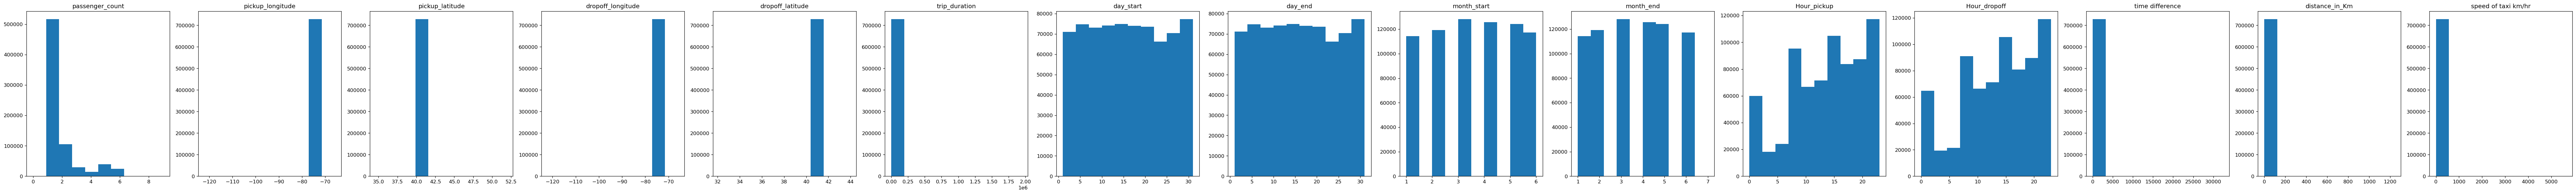

In [60]:
distribution(data, numerical_cols)

## Distributions of continous/discrete variables

### Passenger Count

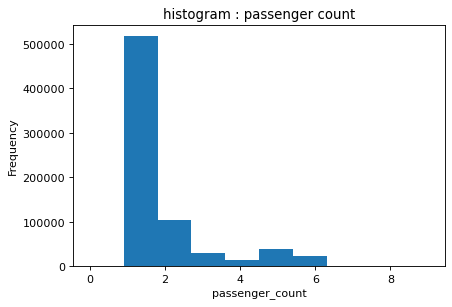

In [61]:
# plotting histogram or passenger count(discrete variable)
plt.figure(dpi = 80)
plt.hist(data['passenger_count'])
plt.xlabel("passenger_count")
plt.ylabel('Frequency')
plt.title("histogram : passenger count")
plt.show()

* Most passengers lie in the range between 1-2

In [62]:
# calculating points of standard deviation
pass_c = data['passenger_count']
p_mean = pass_c.mean()
p_median = pass_c.median()
p_stdev = pass_c.mean()- pass_c.std(),pass_c.mean()+ pass_c.std() 

# checking
p_mean, p_median, p_stdev

(1.6620546205928246, 1.0, (0.34960900473444134, 2.974500236451208))

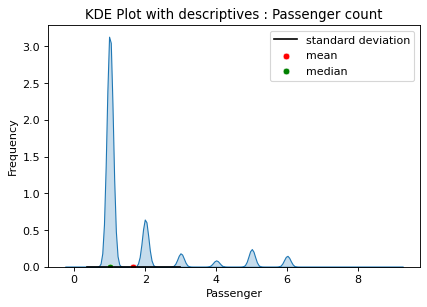

In [63]:
# plotting KDE plot with descriptives
plt.figure(dpi = 80)
sns.kdeplot(pass_c, shade = True)
sns.scatterplot( [p_mean], [0], color='red', label='mean')
sns.scatterplot( [p_median], [0], color='green', label='median')

sns.lineplot( p_stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("Passenger")
plt.ylabel('Frequency')
plt.title("KDE Plot with descriptives : Passenger count")
plt.show()

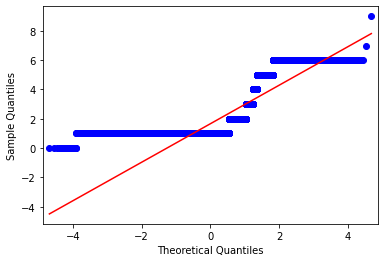

In [64]:
#qq plot explain
sm.qqplot(pass_c, line='s') 
py.show() 

**If the distribution is normal then data would align along the red diagonal line of qq plot. Since it is not aligned, data is not normally distributed.**

In [65]:
data['passenger_count'].skew()

2.135237482375149

In [66]:
data['passenger_count'].kurtosis()

3.464417258605018

### Distance in km

In [67]:
# calculating measures distance_in_Km(continuous variables)
dist_mean = data['distance_in_Km'].mean()
dist_median = data['distance_in_Km'].median()
dist_mode = data['distance_in_Km'].mode()
dist_stdev = data['distance_in_Km'].mean()- data['distance_in_Km'].std(), data['distance_in_Km'].mean()+ data['distance_in_Km'].std() 


# checking
dist_mean, dist_median, dist_mode,dist_stdev

(3.4424636186755055,
 2.0960733875849886,
 0    0.0
 dtype: float64,
 (-0.9142040668482441, 7.799131304199255))

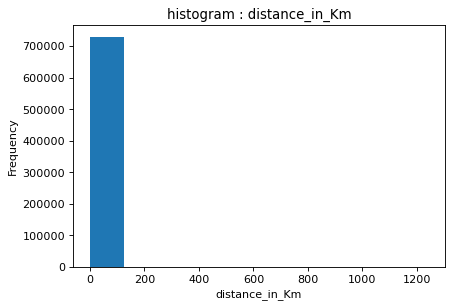

In [68]:
# plotting histogram
plt.figure(dpi = 80)
plt.hist(data['distance_in_Km'])
plt.xlabel("distance_in_Km")
plt.ylabel('Frequency')
plt.title("histogram : distance_in_Km")
plt.show()

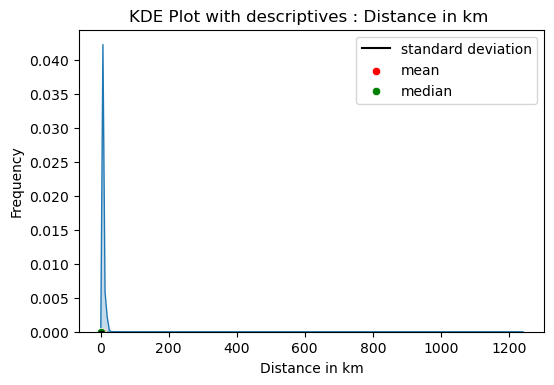

In [69]:
# plotting KDE plot with descriptives
plt.figure(dpi = 100)
sns.kdeplot(data['distance_in_Km'], shade = True)
sns.scatterplot( [dist_mean], [0], color='red', label='mean')
sns.scatterplot( [dist_median], [0], color='green', label='median')

sns.lineplot( dist_stdev, [0,0], color='black', label='standard deviation')

plt.xlabel("Distance in km")
plt.ylabel('Frequency')
plt.title("KDE Plot with descriptives : Distance in km ")
plt.show()

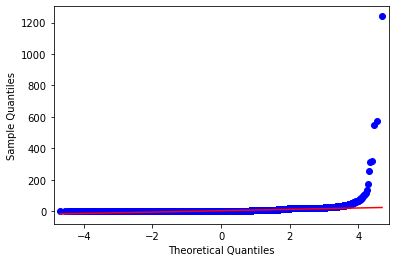

In [70]:
#qq plot explain
sm.qqplot(data['distance_in_Km'], line='s') 
py.show() 

In [1]:
#explain Skewness
data['trip_duration'].skew()

NameError: name 'data' is not defined

In [72]:
#Kurtosis Positive
data['distance_in_Km'].kurtosis()

9756.374216606568

# 2.1Univariate Analysis: Numerical Variables

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   729322 non-null  category      
 1   vendor_id            729322 non-null  category      
 2   pickup_datetime      729322 non-null  datetime64[ns]
 3   dropoff_datetime     729322 non-null  datetime64[ns]
 4   passenger_count      729322 non-null  int64         
 5   pickup_longitude     729322 non-null  float64       
 6   pickup_latitude      729322 non-null  float64       
 7   dropoff_longitude    729322 non-null  float64       
 8   dropoff_latitude     729322 non-null  float64       
 9   store_and_fwd_flag   729322 non-null  category      
 10  trip_duration        729322 non-null  int64         
 11  day_start            729322 non-null  int64         
 12  day_end              729322 non-null  int64         
 13  month_start   

In [74]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
trip_duration            int64
day_start                int64
day_end                  int64
month_start              int64
month_end                int64
Hour_pickup              int64
Hour_dropoff             int64
time difference        float64
distance_in_Km         float64
speed of taxi km/hr    float64
dtype: object

In [75]:
# segregating variables into groups
location_details = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
taxi_duration = ['time difference','distance_in_Km','speed of taxi km/hr','passenger_count']
datetime_details = ['day_start','day_end','month_start','month_end','Hour_pickup','Hour_dropoff','trip_duration']

In [76]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  #enummerate used to loop over index and values where 'j' takes index and 'i' takes values
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

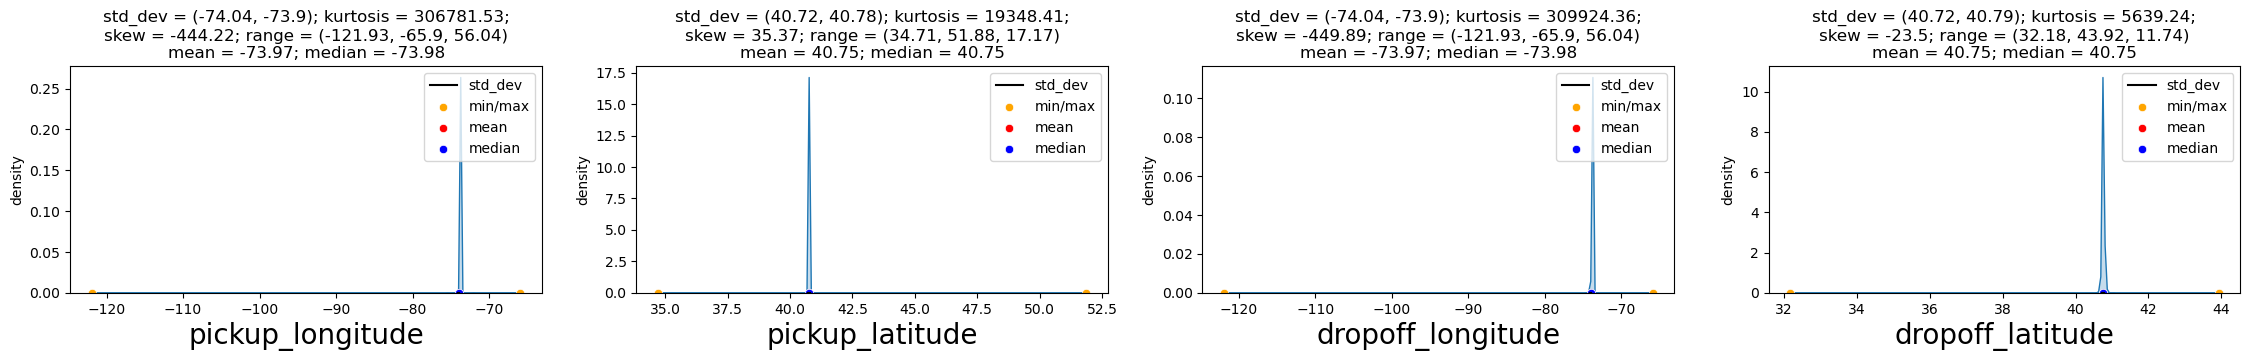

In [77]:
UVA_numeric(data,location_details)

**Summary**
*    Considering the kurtosis and skewness value  for all 4 of these plots.We will check i any Outliers/Extreme values are present.

**Will check if need to Remove Outliers to visulaise these plots.So if present will be removed.**

In [78]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = data[location_details]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation) see emprical rule eyound 3std_dev 
#https://towardsdatascience.com/68-95-99-7-the-three-sigma-rule-of-thumb-used-in-power-bi-59cd50b242e2
cm_data = cm_data[cm_data['pickup_longitude'] < factor*cm_data['pickup_longitude'].std()]
cm_data = cm_data[cm_data['pickup_latitude'] < factor*cm_data['pickup_latitude'].std()]
cm_data = cm_data[cm_data['dropoff_longitude'] < factor*cm_data['dropoff_longitude'].std()]
cm_data = cm_data[cm_data['dropoff_latitude'] < factor*cm_data['dropoff_latitude'].std()]

# checking how many points removed
len(data), len(cm_data)

(729322, 0)

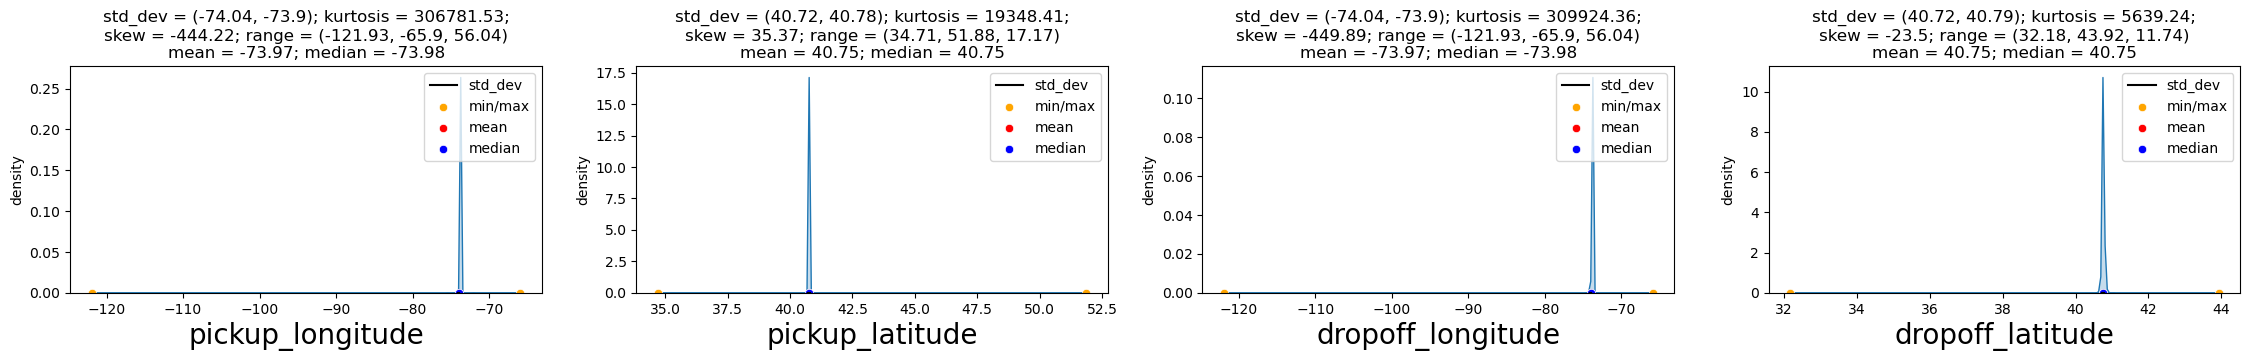

In [79]:
UVA_numeric(data,location_details)

**No outliers present.So no data removed.**

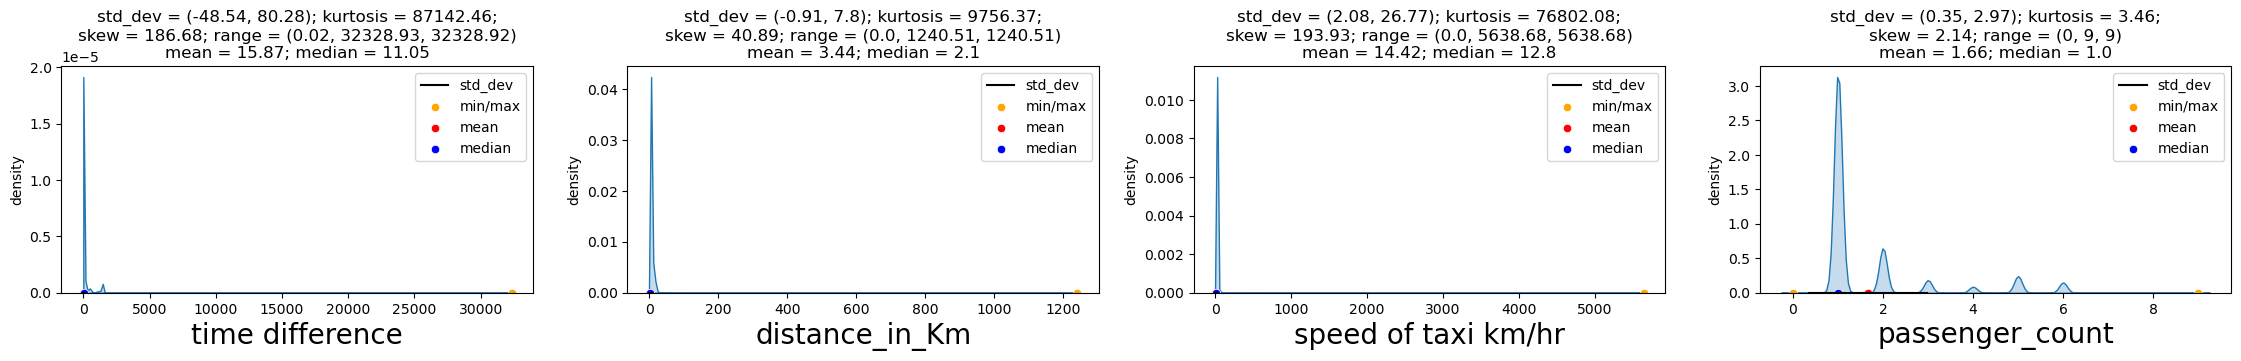

In [80]:
UVA_numeric(data,taxi_duration)

**Summary**
*    Considering the kurtosis and skewness value  for all 4 of these plots. Outliers/Extreme values are present.

In [81]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = data[taxi_duration]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation) see emprical rule beyound 3std_dev 
#https://towardsdatascience.com/68-95-99-7-the-three-sigma-rule-of-thumb-used-in-power-bi-59cd50b242e2
cm_data = cm_data[cm_data['time difference'] < factor*cm_data['time difference'].std()]
cm_data = cm_data[cm_data['distance_in_Km'] < factor*cm_data['distance_in_Km'].std()]
cm_data = cm_data[cm_data['speed of taxi km/hr'] < factor*cm_data['speed of taxi km/hr'].std()]
cm_data = cm_data[cm_data['passenger_count'] < factor*cm_data['passenger_count'].std()]

# checking how many points removed
len(data), len(cm_data)

(729322, 571825)

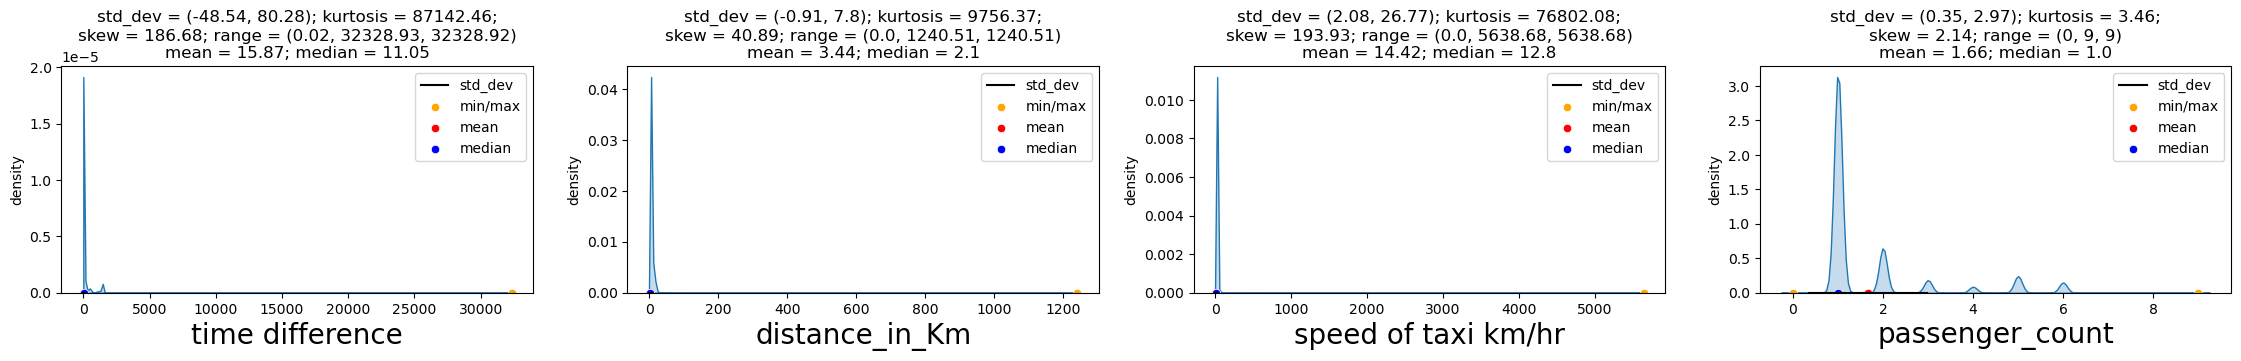

In [82]:
UVA_numeric(data,taxi_duration)

**Summary of taxi_duration**

After Removing extreme/outliers, plots are still very skewed. So try using factor = 1

In [83]:
# standard deviation factor
factor = 1

# copying current_month
cm_data = data[taxi_duration]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation) see emprical rule beyound 3std_dev 
#https://towardsdatascience.com/68-95-99-7-the-three-sigma-rule-of-thumb-used-in-power-bi-59cd50b242e2
cm_data = cm_data[cm_data['time difference'] < factor*cm_data['time difference'].std()]
cm_data = cm_data[cm_data['distance_in_Km'] < factor*cm_data['distance_in_Km'].std()]
cm_data = cm_data[cm_data['speed of taxi km/hr'] < factor*cm_data['speed of taxi km/hr'].std()]
cm_data = cm_data[cm_data['passenger_count'] < factor*cm_data['passenger_count'].std()]

# checking how many points removed
len(data), len(cm_data)

(729322, 67493)

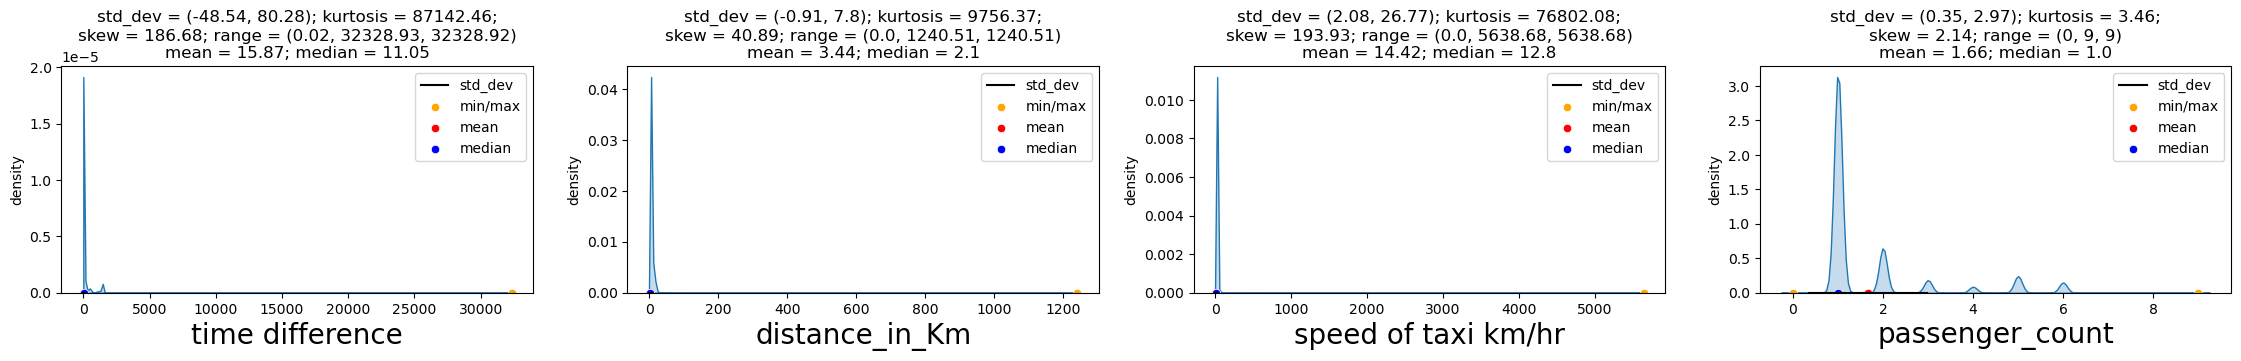

In [84]:
UVA_numeric(data,taxi_duration)

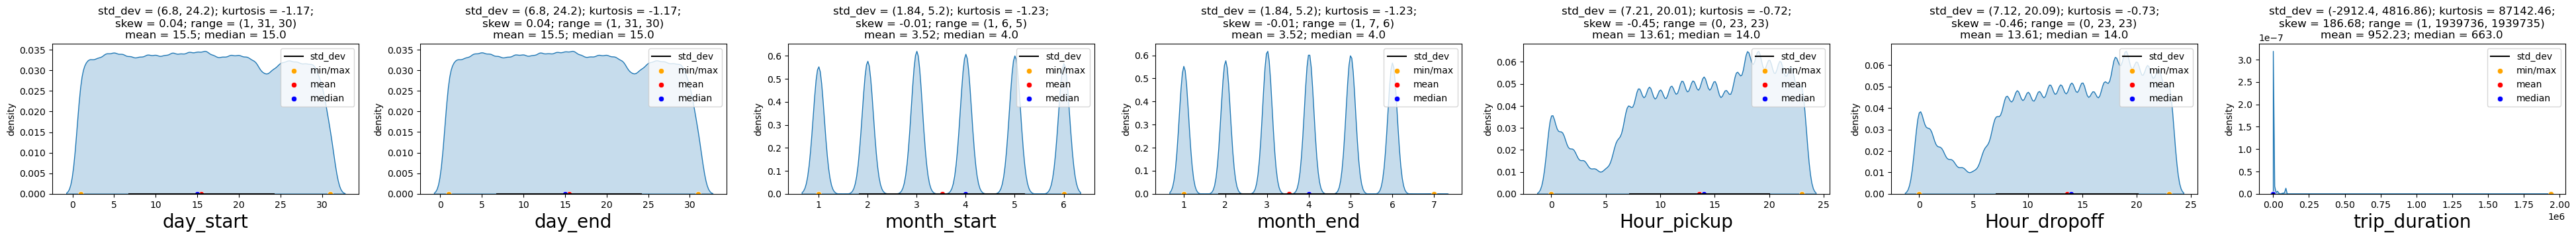

In [85]:
UVA_numeric(data,datetime_details)

## Exploring categorical variable
###Discrete distributions

In [86]:
#features of the dataset
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'day_start', 'day_end', 'month_start', 'month_end',
       'date_pickup', 'date_dropoff', 'Hour_pickup', 'Hour_dropoff',
       'trip_dayofweek', 'time difference', 'Starting_Hrs', 'End_Hrs',
       'distance_in_Km', 'speed of taxi km/hr'],
      dtype='object')

In [87]:
#shape of the data
data.shape

(729322, 25)

In [88]:
#distribution of gender
data['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [89]:
data['store_and_fwd_flag'].value_counts()/sum(data['store_and_fwd_flag'].value_counts().values)

N    0.994461
Y    0.005539
Name: store_and_fwd_flag, dtype: float64

In [90]:
data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994461
Y    0.005539
Name: store_and_fwd_flag, dtype: float64

In [91]:
data['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [92]:
data['vendor_id'].value_counts()/sum(data['vendor_id'].value_counts().values)

2    0.535403
1    0.464597
Name: vendor_id, dtype: float64

In [93]:
data['vendor_id'].value_counts(normalize=True)

2    0.535403
1    0.464597
Name: vendor_id, dtype: float64

In [94]:
#funtion to get idea about other categorical variales
def discrete_check(d):
    print(' Details of '+ d)
    print(data[d].value_counts()) 
    print(data[d].value_counts()/sum(data[d].value_counts().values))
    print(data[d].value_counts(normalize=True))
    print('\n\n')

In [95]:
for i in range(6):
    discrete_check(str(categorical_cols[i]))

 Details of id
id0000001    1
id2665549    1
id2665439    1
id2665445    1
id2665456    1
            ..
id1329820    1
id1329825    1
id1329826    1
id1329827    1
id4000000    1
Name: id, Length: 729322, dtype: int64
id0000001    0.000001
id2665549    0.000001
id2665439    0.000001
id2665445    0.000001
id2665456    0.000001
               ...   
id1329820    0.000001
id1329825    0.000001
id1329826    0.000001
id1329827    0.000001
id4000000    0.000001
Name: id, Length: 729322, dtype: float64
id0000001    0.000001
id2665549    0.000001
id2665439    0.000001
id2665445    0.000001
id2665456    0.000001
               ...   
id1329820    0.000001
id1329825    0.000001
id1329826    0.000001
id1329827    0.000001
id4000000    0.000001
Name: id, Length: 729322, dtype: float64



 Details of vendor_id
2    390481
1    338841
Name: vendor_id, dtype: int64
2    0.535403
1    0.464597
Name: vendor_id, dtype: float64
2    0.535403
1    0.464597
Name: vendor_id, dtype: float64



 Details of s

In [96]:
data['id'].nunique()

729322

In [97]:
data['id'].mode()

0         id0000001
1         id0000003
2         id0000005
3         id0000008
4         id0000016
            ...    
729317    id3999974
729318    id3999983
729319    id3999985
729320    id3999986
729321    id4000000
Name: id, Length: 729322, dtype: category
Categories (729322, object): ['id0000001', 'id0000003', 'id0000005', 'id0000008', ..., 'id3999983', 'id3999985', 'id3999986', 'id4000000']

In [98]:
data['id'].value_counts()

id0000001    1
id2665549    1
id2665439    1
id2665445    1
id2665456    1
            ..
id1329820    1
id1329825    1
id1329826    1
id1329827    1
id4000000    1
Name: id, Length: 729322, dtype: int64

In [99]:
#funtion to get idea about other categorical variales
def discrete_check1(d1):
    print(' Details of '+ d1)
    print(data[d1].nunique())
    print(data[d1].mode())    
    print(data[d1].value_counts())
    print('\n')

In [100]:
for i in range(3,6):
    discrete_check1(str(categorical_cols[i]))

 Details of trip_dayofweek
7
0    Friday
Name: trip_dayofweek, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Satuday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
Friday       111744
Satuday      110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: trip_dayofweek, dtype: int64


 Details of Starting_Hrs
6
0    Eve
Name: Starting_Hrs, dtype: category
Categories (6, object): ['Early Morning', 'Eve', 'Late Night', 'Morning', 'Night', 'Noon']
Eve              171144
Noon             140584
Morning          136415
Night            117407
Early Morning     85592
Late Night        78180
Name: Starting_Hrs, dtype: int64


 Details of End_Hrs
6
0    Eve
Name: End_Hrs, dtype: category
Categories (6, object): ['Early Morning', 'Eve', 'Late Night', 'Morning', 'Night', 'Noon']
Eve              170518
Noon             140951
Morning          135752
Night            119172
Late Night        84172
Early Morning     78757
Nam

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   729322 non-null  category      
 1   vendor_id            729322 non-null  category      
 2   pickup_datetime      729322 non-null  datetime64[ns]
 3   dropoff_datetime     729322 non-null  datetime64[ns]
 4   passenger_count      729322 non-null  int64         
 5   pickup_longitude     729322 non-null  float64       
 6   pickup_latitude      729322 non-null  float64       
 7   dropoff_longitude    729322 non-null  float64       
 8   dropoff_latitude     729322 non-null  float64       
 9   store_and_fwd_flag   729322 non-null  category      
 10  trip_duration        729322 non-null  int64         
 11  day_start            729322 non-null  int64         
 12  day_end              729322 non-null  int64         
 13  month_start   

## Bernoulli 


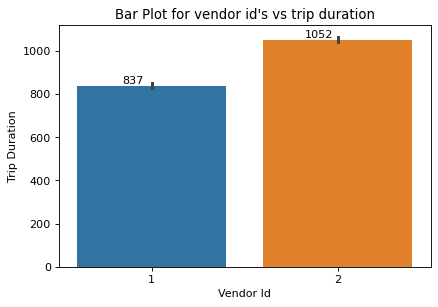

In [102]:
plt.figure(dpi = 80)
ax = sns.barplot(x =data['vendor_id'] , y =  data['trip_duration'])
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.xlabel("Vendor Id")
plt.ylabel('Trip Duration')

plt.title("Bar Plot for vendor id's vs trip duration")
plt.show()

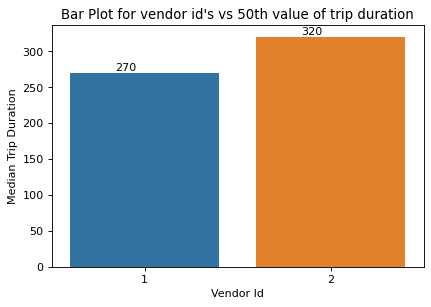

In [103]:
plt.figure(dpi = 80)
ax =sns.barplot(x=data[data['trip_duration']==data['trip_duration'].median()]['vendor_id'].value_counts().index, y = data[data['trip_duration']==data['trip_duration'].median()]['vendor_id'].value_counts().values)
plt.xlabel("Vendor Id")
plt.ylabel('Median Trip Duration')
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.title("Bar Plot for vendor id's vs 50th value of trip duration")
plt.show()

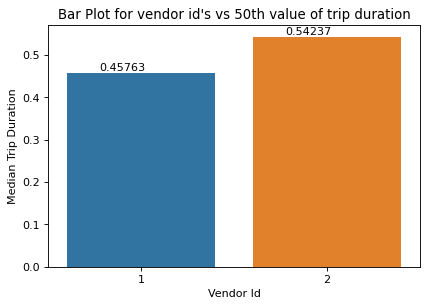

In [104]:
plt.figure(dpi = 80)
ax =sns.barplot(x=data[data['trip_duration']==data['trip_duration'].median()]['vendor_id'].value_counts().index, y = data[data['trip_duration']==data['trip_duration'].median()]['vendor_id'].value_counts(normalize=True).values)
plt.xlabel("Vendor Id")
plt.ylabel('Median Trip Duration')
for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.title("Bar Plot for vendor id's vs 50th value of trip duration")
plt.show()

Text(0.5, 1.0, 'Vendor_id vs Avg trip_duration')

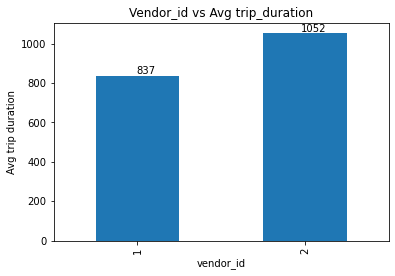

In [105]:
ax = data.groupby('vendor_id')['trip_duration'].mean().plot(kind = 'bar')
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.ylabel('Avg trip duration')
plt.title("Vendor_id vs Avg trip_duration")

**There are more trip durations provided by vendor id 2 than vendor id 1**

## Categorical

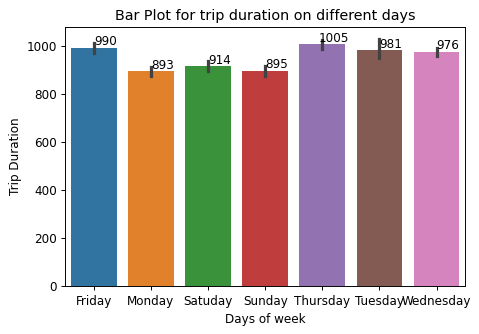

In [106]:
plt.figure(dpi = 86)
ax = sns.barplot(x =data['trip_dayofweek'] , y =  data['trip_duration'])
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.6, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.xlabel("Days of week")
plt.ylabel('Trip Duration')
plt.title("Bar Plot for trip duration on different days")
plt.show()

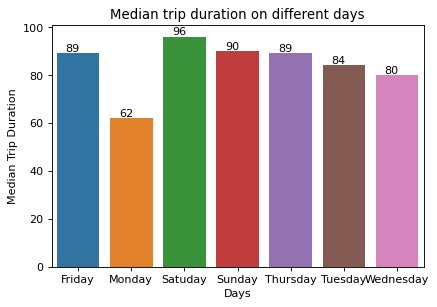

In [107]:
plt.figure(dpi = 80)
ax =sns.barplot(x=data[data['trip_duration']==data['trip_duration'].median()]['trip_dayofweek'].value_counts().index, y = data[data['trip_duration']==data['trip_duration'].median()]['trip_dayofweek'].value_counts().values)
plt.xlabel("Days")
plt.ylabel('Median Trip Duration')
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.title("Median trip duration on different days")
plt.show()

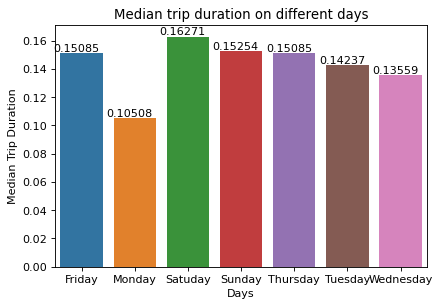

In [108]:
plt.figure(dpi = 80)
ax =sns.barplot(x=data[data['trip_duration']==data['trip_duration'].median()]['trip_dayofweek'].value_counts().index, y = data[data['trip_duration']==data['trip_duration'].median()]['trip_dayofweek'].value_counts(normalize=True).values)
plt.xlabel("Days")
plt.ylabel('Median Trip Duration')
for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.title("Median trip duration on different days")
plt.show()

Text(0.5, 1.0, 'Days vs Avg trip_duration')

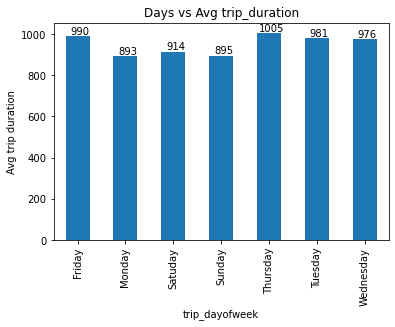

In [109]:
ax = data.groupby('trip_dayofweek')['trip_duration'].mean().plot(kind = 'bar')
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.ylabel('Avg trip duration')
plt.title("Days vs Avg trip_duration")

## 2.2 Univariate Analysis : Categorical Varibales

In [110]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

id                          category
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
store_and_fwd_flag          category
date_pickup           datetime64[ns]
date_dropoff          datetime64[ns]
trip_dayofweek              category
Starting_Hrs                category
End_Hrs                     category
dtype: object

In [111]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 80)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

### Provider_info

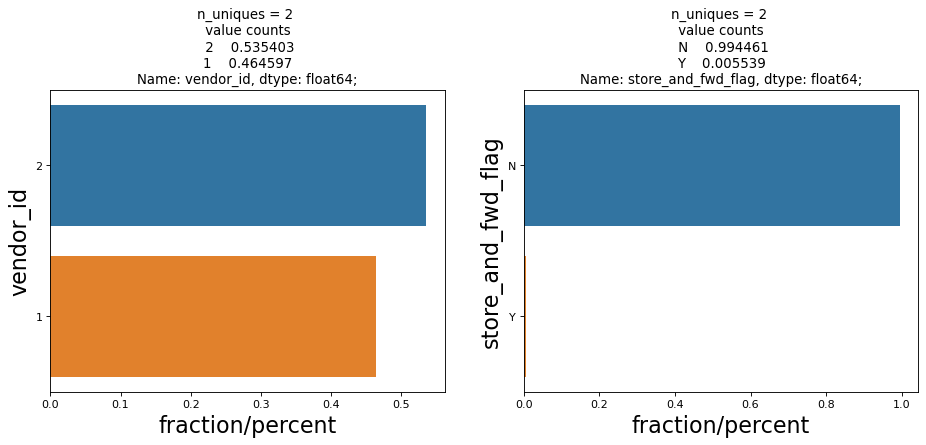

In [112]:
UVA_category(data, ['vendor_id','store_and_fwd_flag'])

### 

## Trip Info

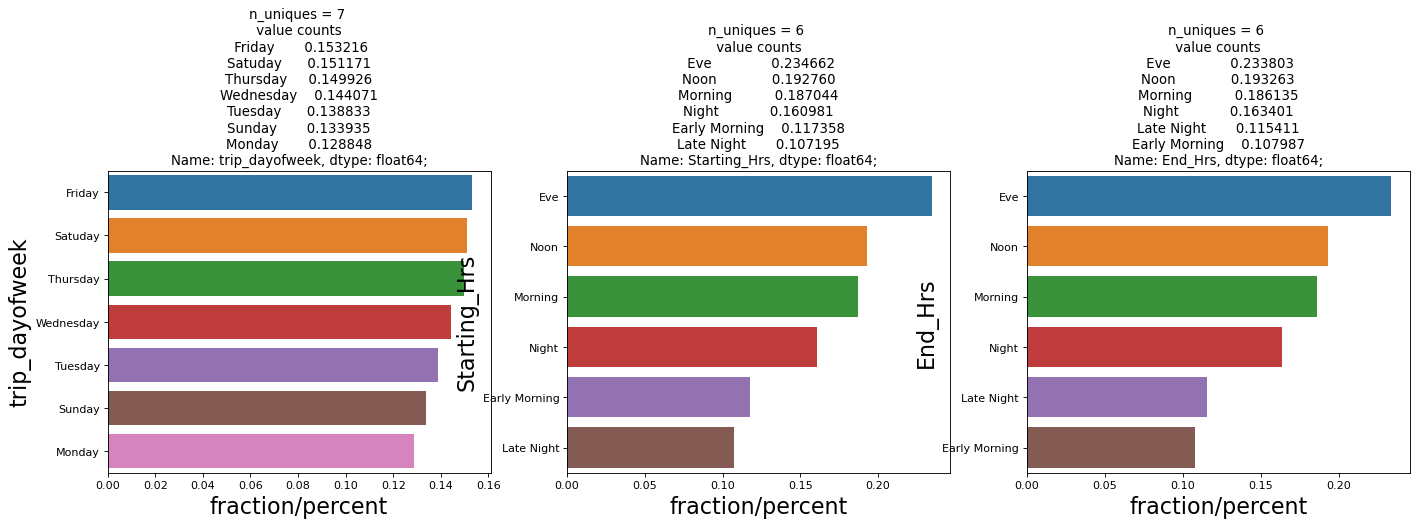

In [113]:
UVA_category(data,['trip_dayofweek','Starting_Hrs','End_Hrs'])  

In [114]:
## Univariate: Missing Values
# finding number of missing values in every variable
data.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
day_start              0
day_end                0
month_start            0
month_end              0
date_pickup            0
date_dropoff           0
Hour_pickup            0
Hour_dropoff           0
trip_dayofweek         0
time difference        0
Starting_Hrs           0
End_Hrs                0
distance_in_Km         0
speed of taxi km/hr    0
dtype: int64

## Univariate Analysis: Outliers


In [115]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boxplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

**Numerical variables**

True
True
True
True


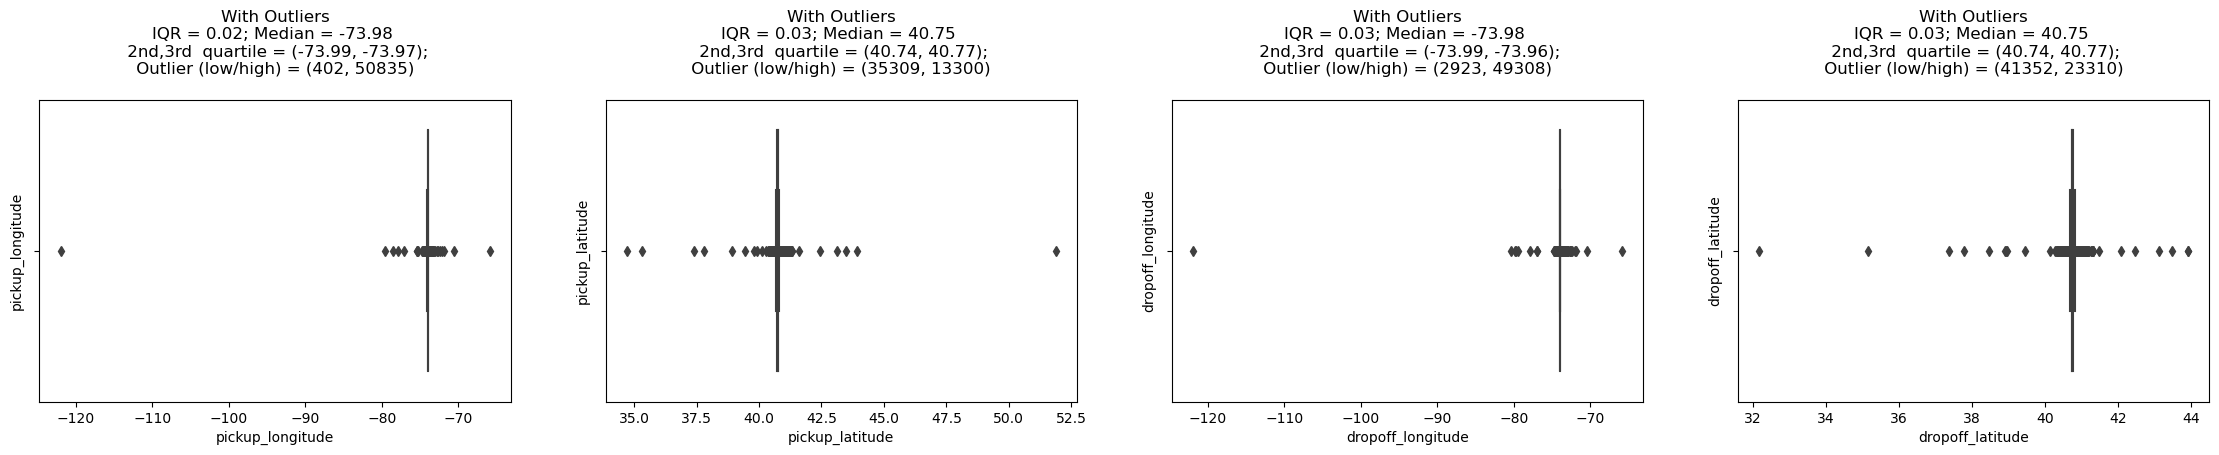

In [116]:
UVA_outlier(data,location_details,)

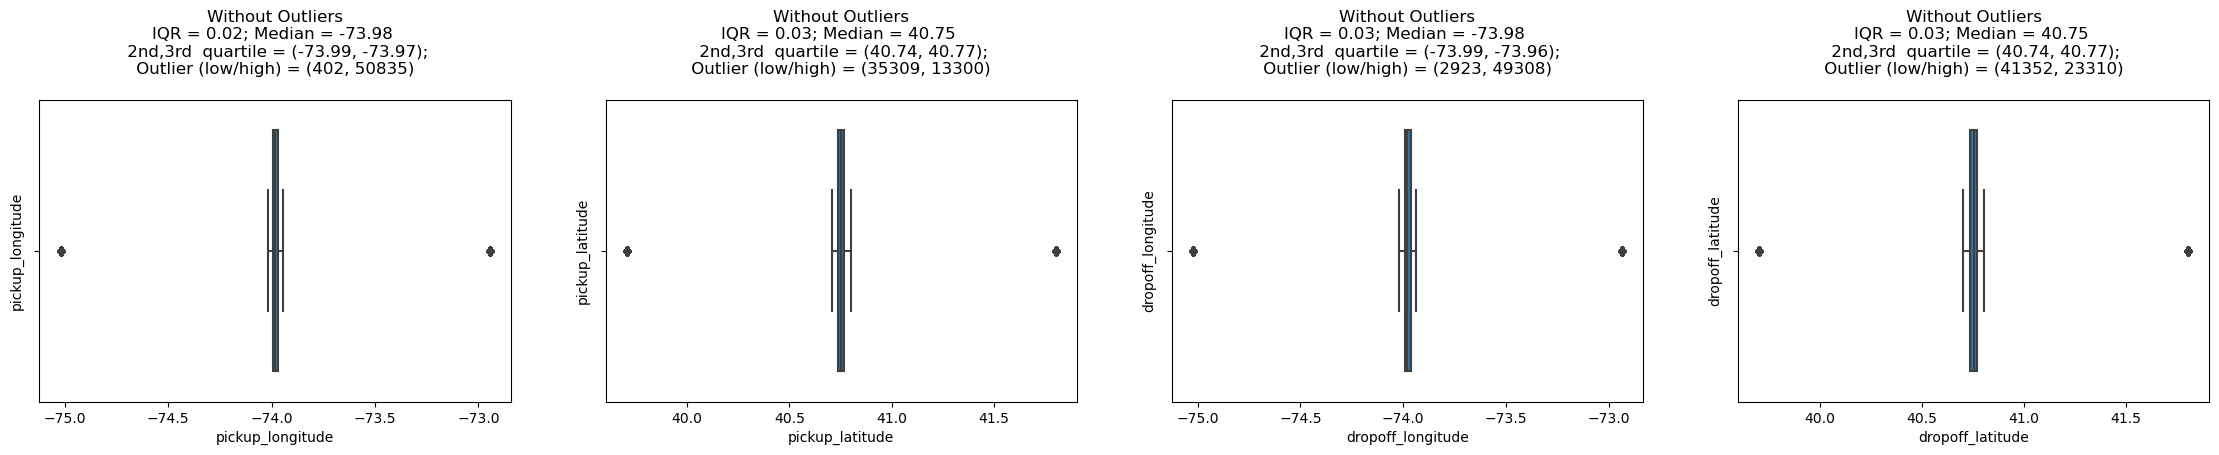

In [117]:
UVA_outlier(data,location_details, include_outlier=False)

True
True
True
True


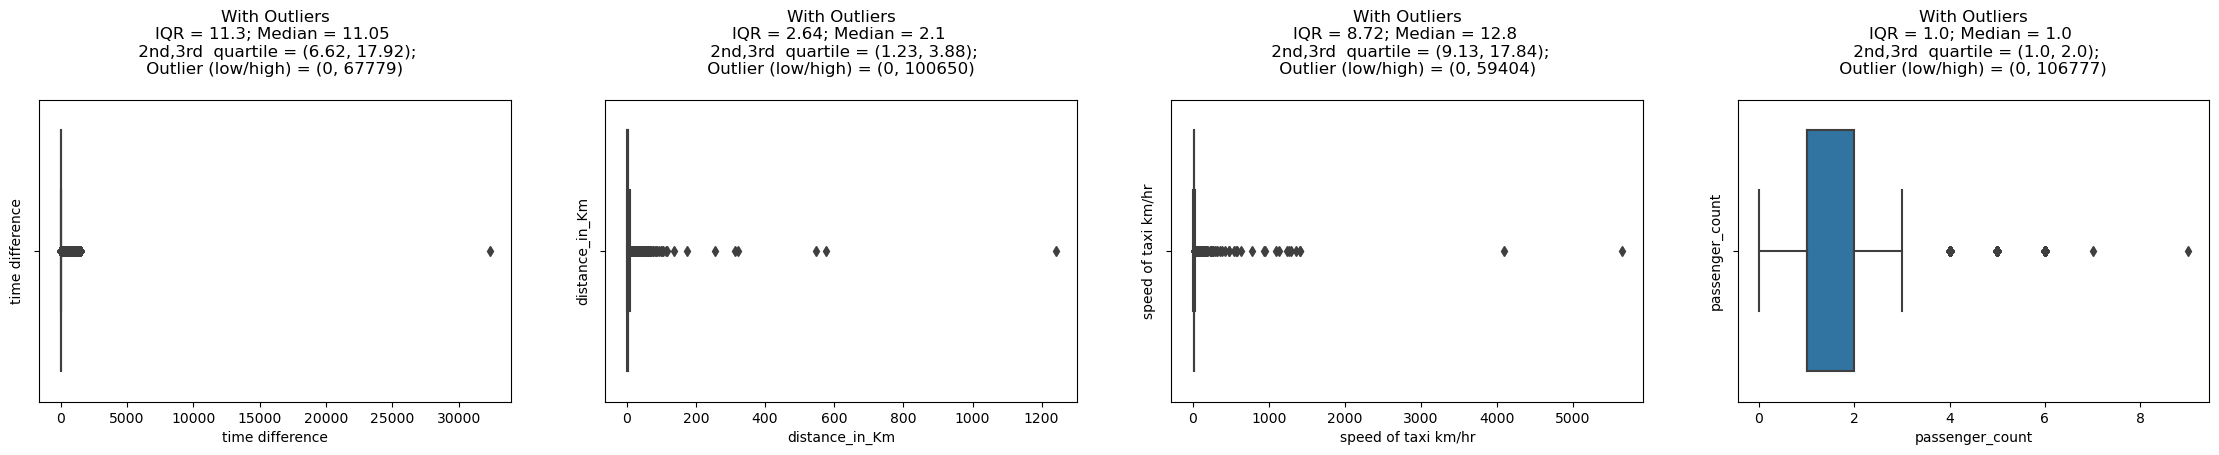

In [118]:
UVA_outlier(data,taxi_duration,)

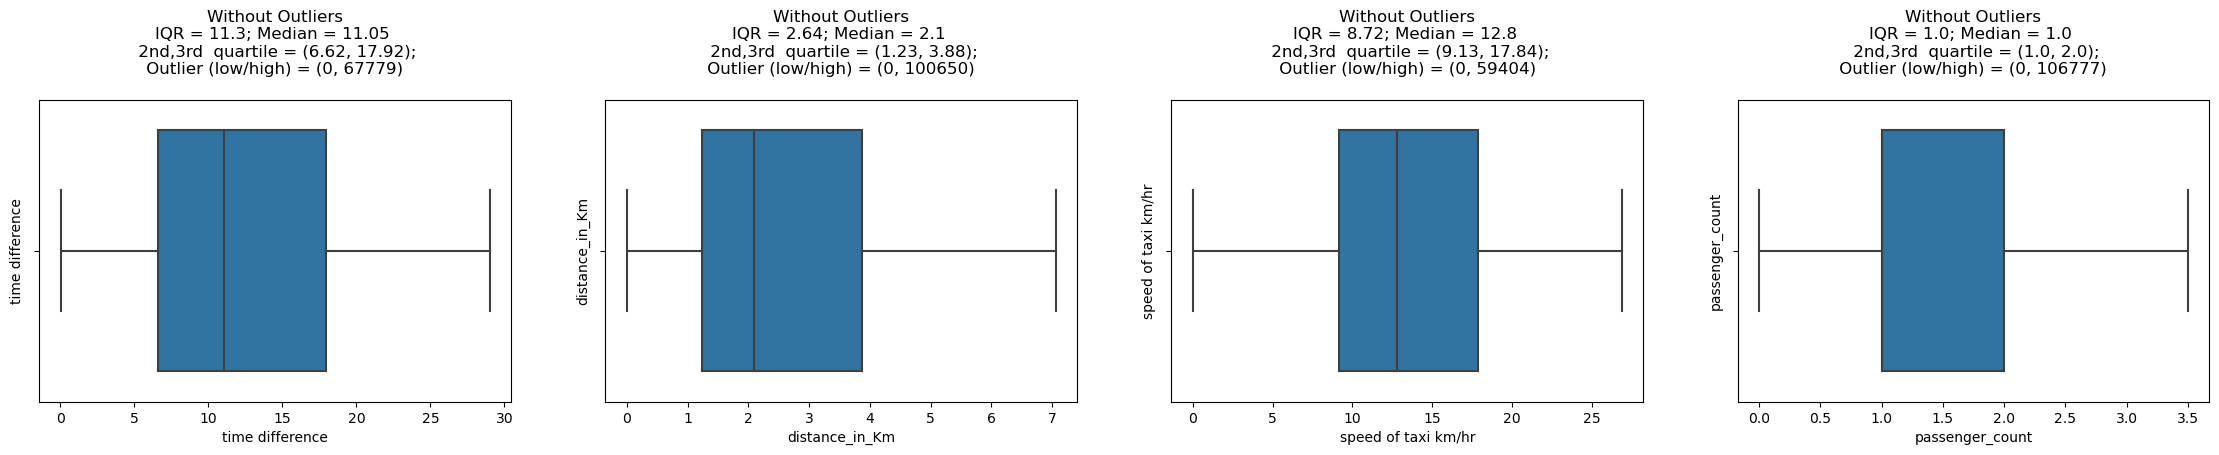

In [119]:
UVA_outlier(data,taxi_duration,include_outlier=False)

True
True
True
True
True
True
True


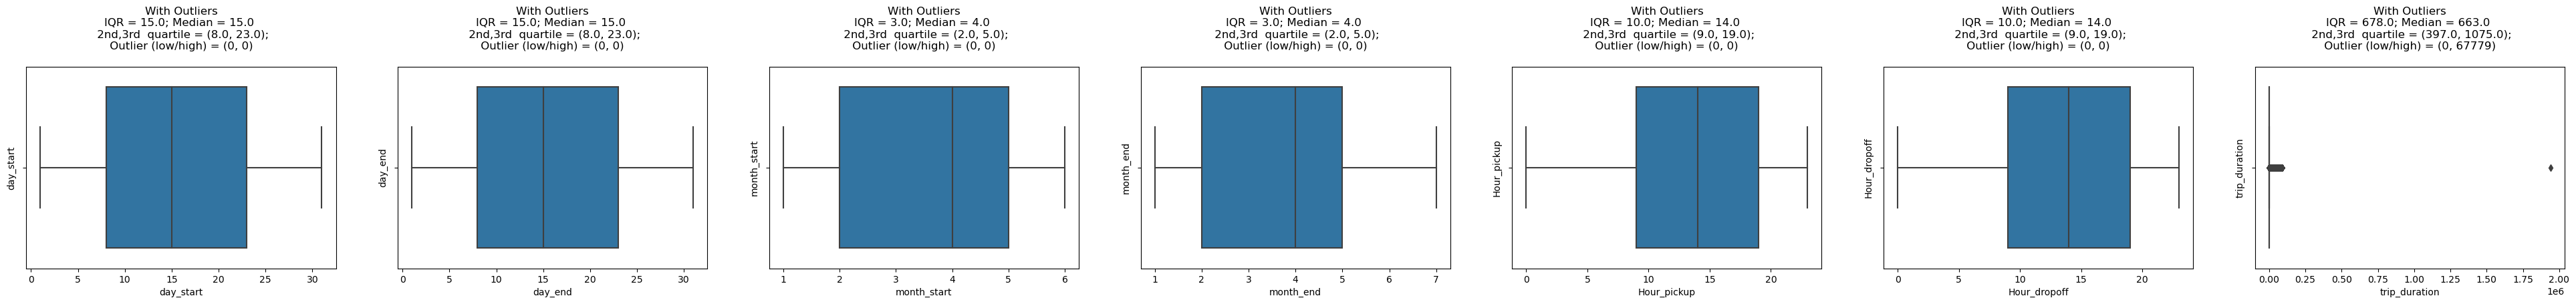

In [120]:
UVA_outlier(data,datetime_details,)

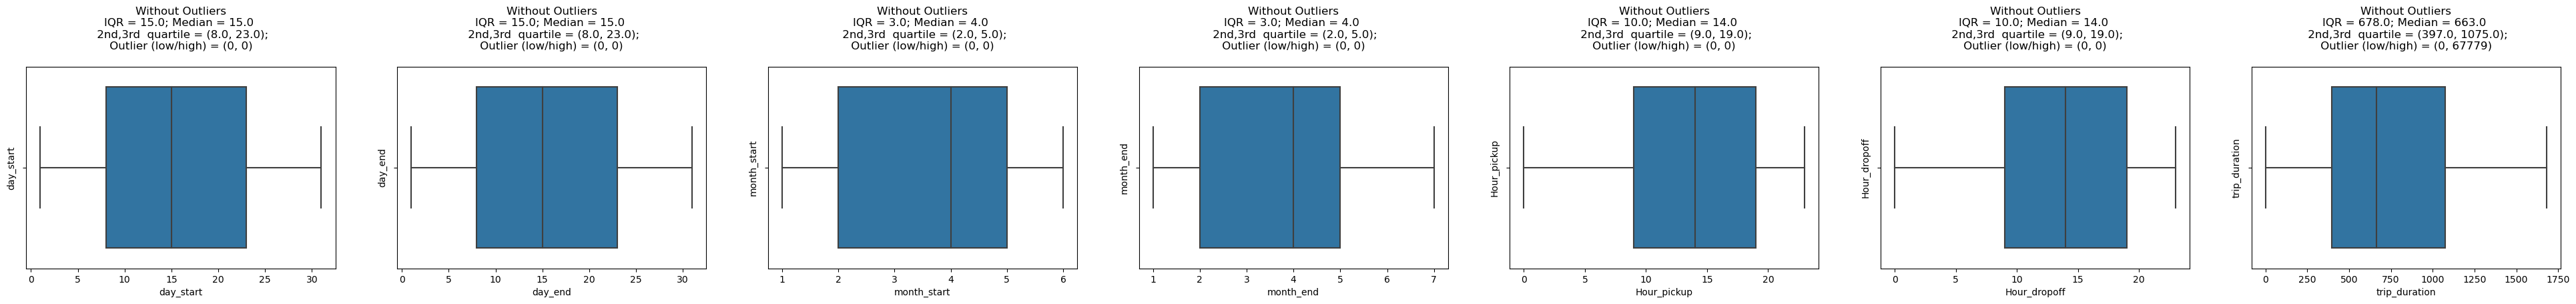

In [121]:
UVA_outlier(data,datetime_details,include_outlier=False)

## Central limit theorem
**passenger_count,hour_pickup,hour_dropup**

In [122]:
population = data['Hour_pickup']

In [123]:
population = pd.DataFrame(population)

array([[<AxesSubplot:title={'center':'Hour_pickup'}>]], dtype=object)

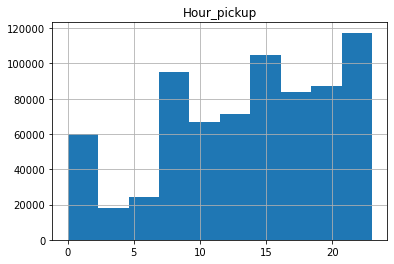

In [124]:
population.hist(bins=10)

In [125]:
population['Hour_pickup'].mean()

13.611698262221624

In [126]:
# Create a list
sampled_means = []

# For 1000  times,
for i in range(0,1000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sampled_means.append(population.sample(n=100).mean().values[0])

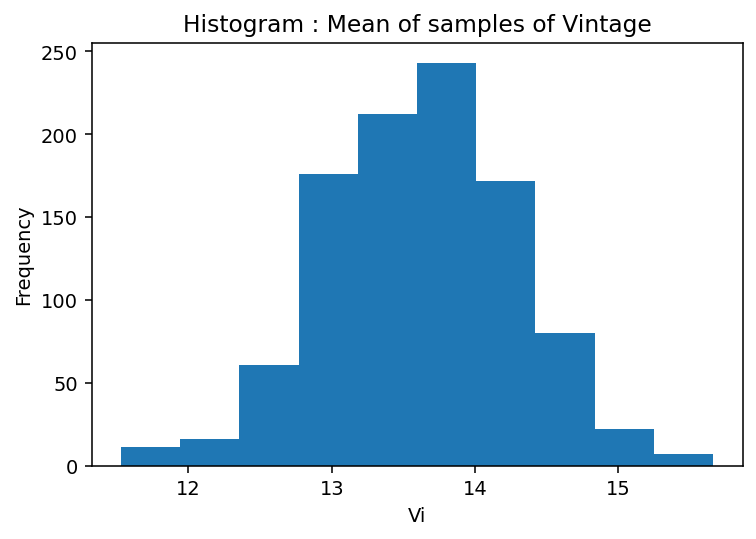

In [127]:
# plotting histogram
plt.figure(dpi = 140)
plt.hist(sampled_means)
plt.xlabel("Vi")
plt.ylabel('Frequency')
plt.title("Histogram : Mean of samples of Vintage")
plt.show()

In [128]:
# View the mean of the sampled_means
pd.Series(sampled_means).mean()

13.621370000000015

In [129]:
# Subtract Mean Sample Mean From True Population Mean
error = population['Hour_pickup'].mean() - pd.Series(sampled_means).mean()

# Print
print('The Mean Sample Mean is only %f different the True Population mean!' % error)

The Mean Sample Mean is only -0.009672 different the True Population mean!


# 3.1 Bivariate Analysis : Numerical-Numerical

In [130]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
trip_duration            int64
day_start                int64
day_end                  int64
month_start              int64
month_end                int64
Hour_pickup              int64
Hour_dropoff             int64
time difference        float64
distance_in_Km         float64
speed of taxi km/hr    float64
dtype: object

**Correlation Matrix**

In [131]:
# calculating correlation
correlation = numerical.corr()
correlation

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_start,day_end,month_start,month_end,Hour_pickup,Hour_dropoff,time difference,distance_in_Km,speed of taxi km/hr
passenger_count,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,0.001737,0.001915,-0.001481,-0.001497,0.009851,0.009214,0.013022,0.009179,-0.002632
pickup_longitude,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,-0.001378,-0.001531,0.004037,0.004090,0.010754,0.011170,0.035447,0.251689,0.095492
pickup_latitude,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.006367,-0.006369,-0.000165,-0.000233,0.011433,0.018061,-0.038163,-0.128620,0.116668
dropoff_longitude,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,-0.000294,-0.000378,0.003883,0.003923,-0.022014,-0.023193,0.020664,0.132434,0.046072
dropoff_latitude,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.006082,-0.006109,-0.000580,-0.000621,0.014257,0.018173,-0.028283,-0.153788,-0.054316
trip_duration,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.000999,0.001701,0.009378,0.010135,0.002979,0.003027,1.000000,0.125791,-0.028140
day_start,0.001737,-0.001378,-0.006367,-0.000294,-0.006082,0.000999,1.000000,0.997913,-0.014995,-0.014635,-0.001699,-0.001825,0.000999,0.005136,-0.001721
day_end,0.001915,-0.001531,-0.006369,-0.000378,-0.006109,0.001701,0.997913,1.000000,-0.015091,-0.015440,-0.001560,-0.002035,0.001701,0.004864,-0.001736
month_start,-0.001481,0.004037,-0.000165,0.003883,-0.000580,0.009378,-0.014995,-0.015091,1.000000,0.999937,-0.003301,-0.004013,0.009378,0.016578,-0.016815
month_end,-0.001497,0.004090,-0.000233,0.003923,-0.000621,0.010135,-0.014635,-0.015440,0.999937,1.000000,-0.003043,-0.004386,0.010135,0.016756,-0.016788


In [132]:
c = numerical.corr().abs()

s = c.unstack()
so = s.sort_values(kind = "quicksort",ascending = False)
so = pd.DataFrame(so,columns = ['Pearson Correlation'])

In [133]:
so[so['Pearson Correlation']<1].head(20)

,,Pearson Correlation
month_start,month_end,0.999937
month_end,month_start,0.999937
day_start,day_end,0.997913
day_end,day_start,0.997913
Hour_dropoff,Hour_pickup,0.934591
Hour_pickup,Hour_dropoff,0.934591
dropoff_longitude,pickup_longitude,0.780647
pickup_longitude,dropoff_longitude,0.780647
speed of taxi km/hr,distance_in_Km,0.575080
distance_in_Km,speed of taxi km/hr,0.575080


**Heatmap**


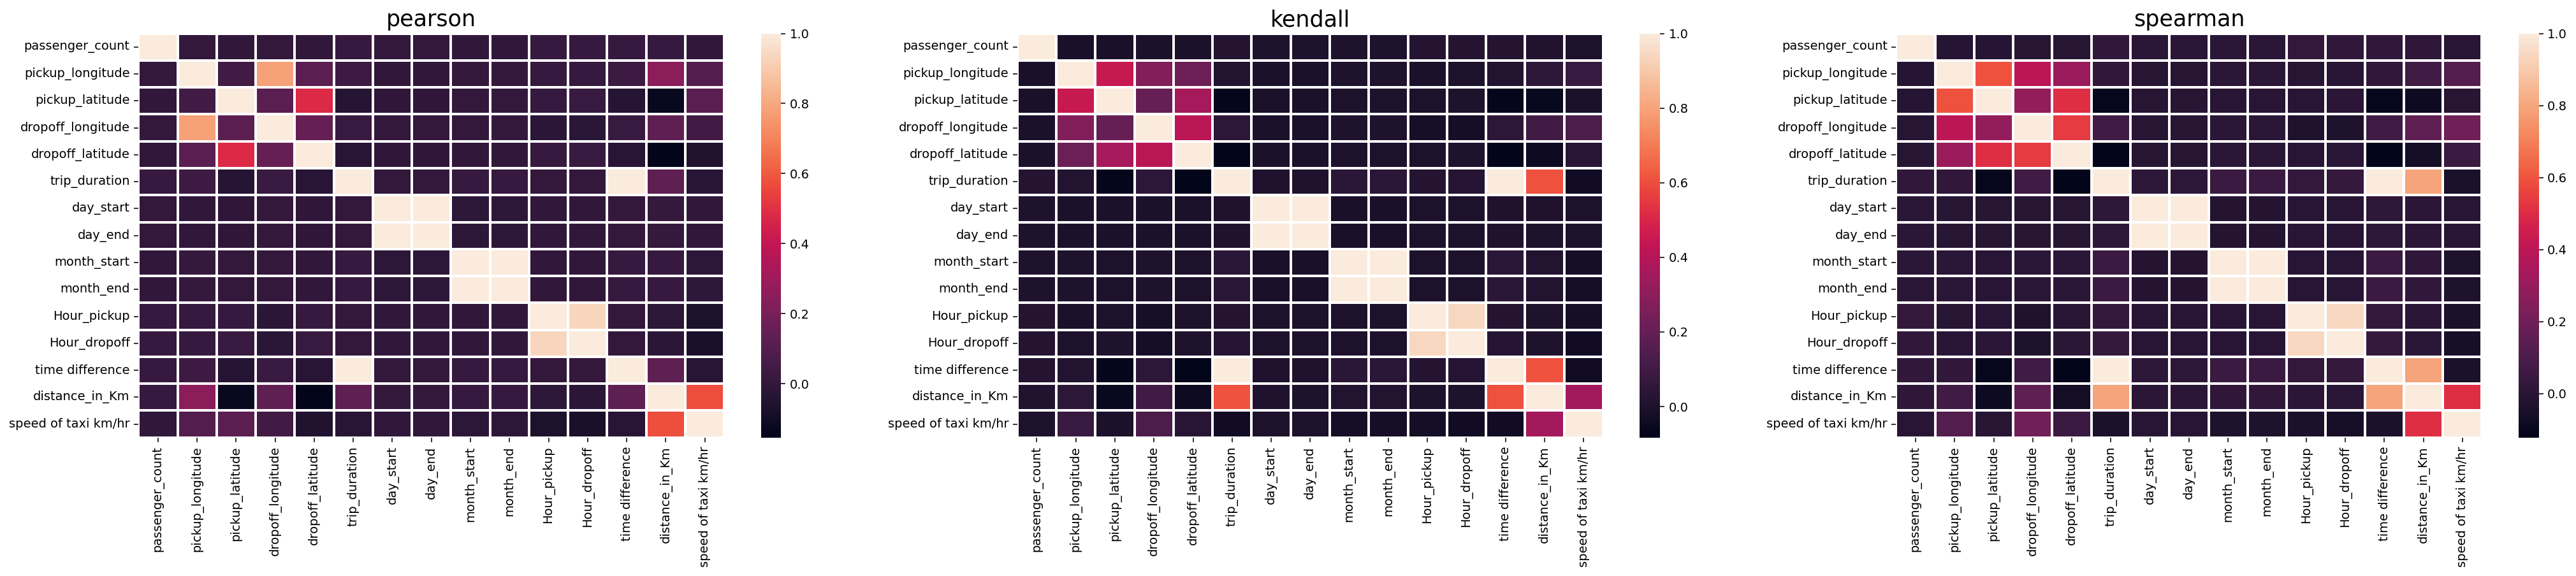

In [134]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

In [135]:
# extracting trip info
var = []
var.extend(location_details)
var.extend(taxi_duration)
var.extend(datetime_details)

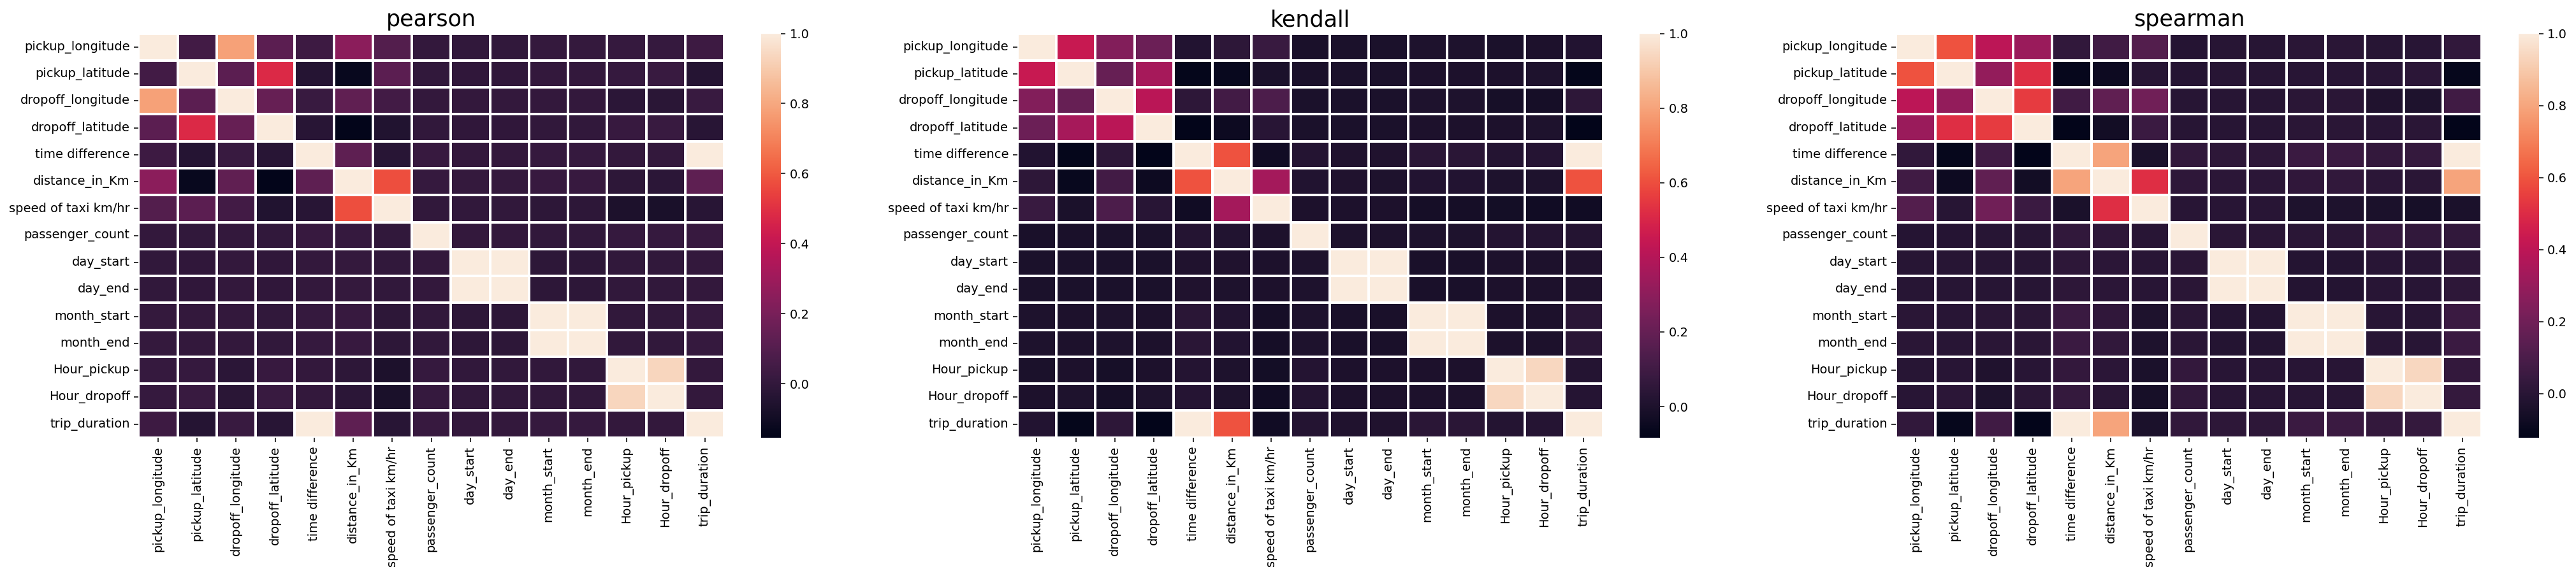

In [136]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

**Scatterplot**

In [137]:
# Grouping variables
# segregating variables into groups
taxi_duration = ['time difference','distance_in_Km','speed of taxi km/hr','passenger_count']
datetime_details = ['day_start','day_end','month_start','month_end','Hour_pickup','Hour_dropoff','trip_duration']

<Figure size 840x560 with 0 Axes>

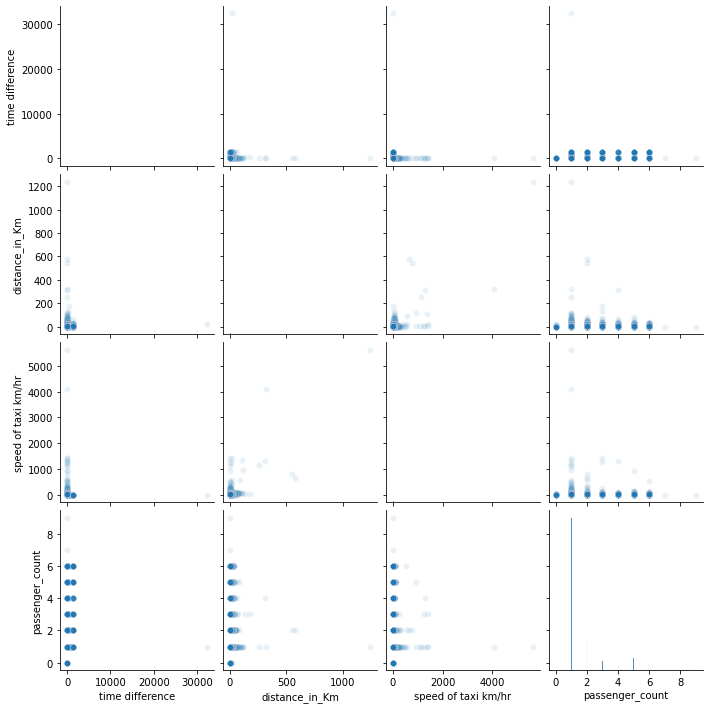

In [138]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[taxi_duration],plot_kws = {'alpha':0.1})

In [139]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

<Figure size 840x560 with 0 Axes>

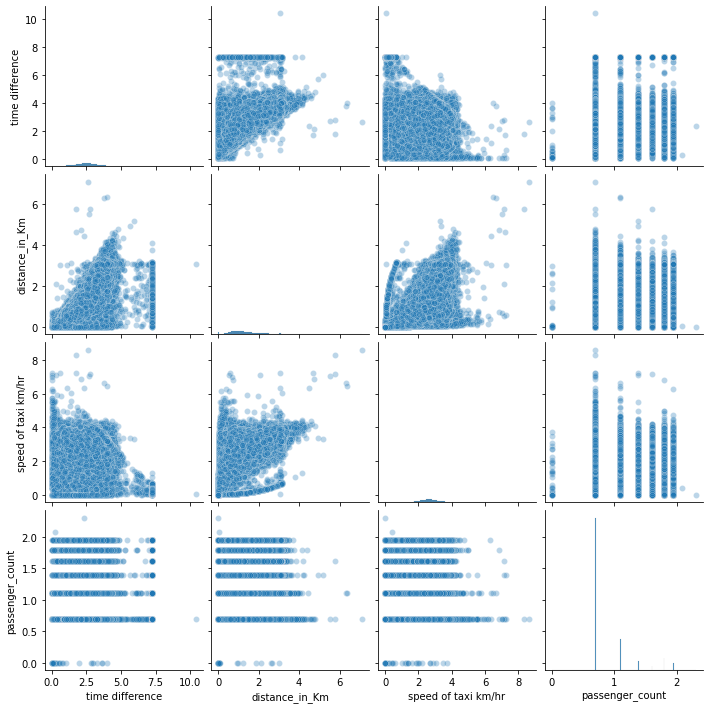

In [140]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[taxi_duration],plot_kws = {'alpha':0.3})

<Figure size 840x560 with 0 Axes>

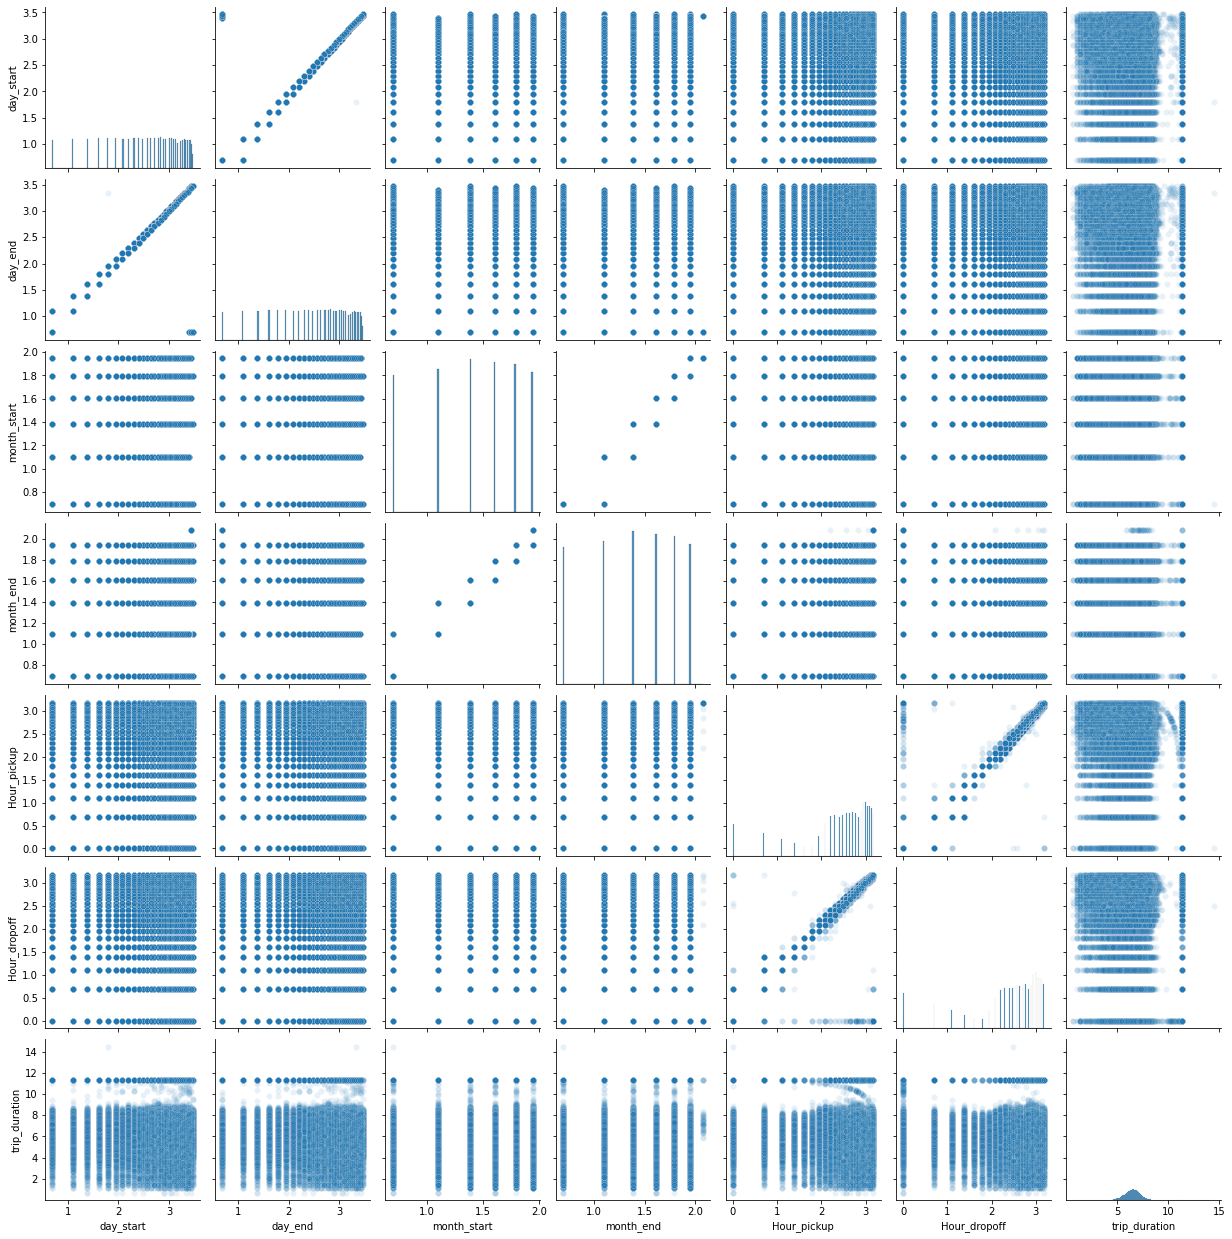

In [141]:
# datetime_details variables
plt.figure(dpi=140)
sns.pairplot(numerical[datetime_details],plot_kws = {'alpha':0.1})

<Figure size 840x560 with 0 Axes>

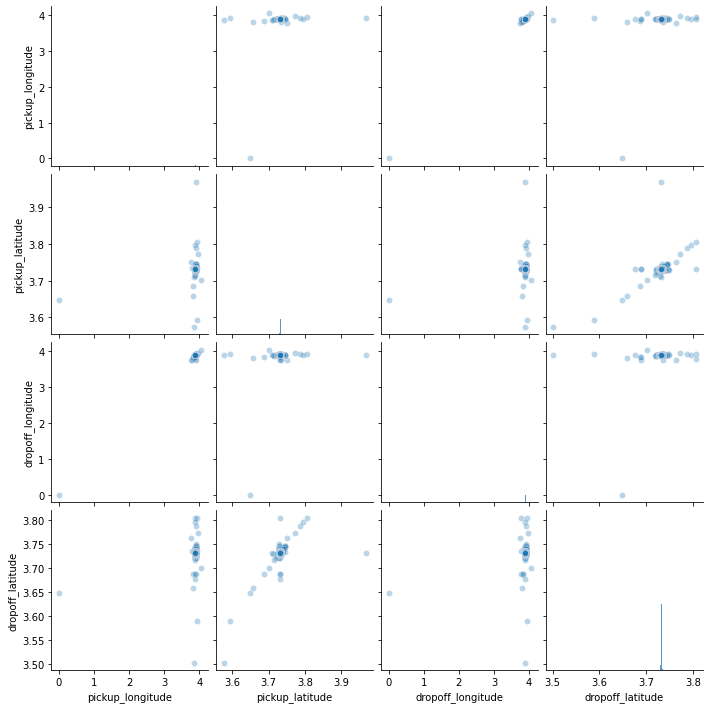

In [142]:
#location_details variables
plt.figure(dpi=140)
sns.pairplot(numerical[location_details],plot_kws = {'alpha':0.3})

# 2.2Bivariate Analysis: Continuous-Categorical variables


In [143]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [144]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [145]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

### List of few hypothesis for testing

**1.What was the trip duration made during morning?**

**2.What was the trip duration made during evening?**

**3.What was the trip duration made during afternoon?**

**4.What was the trip duration made during night?**


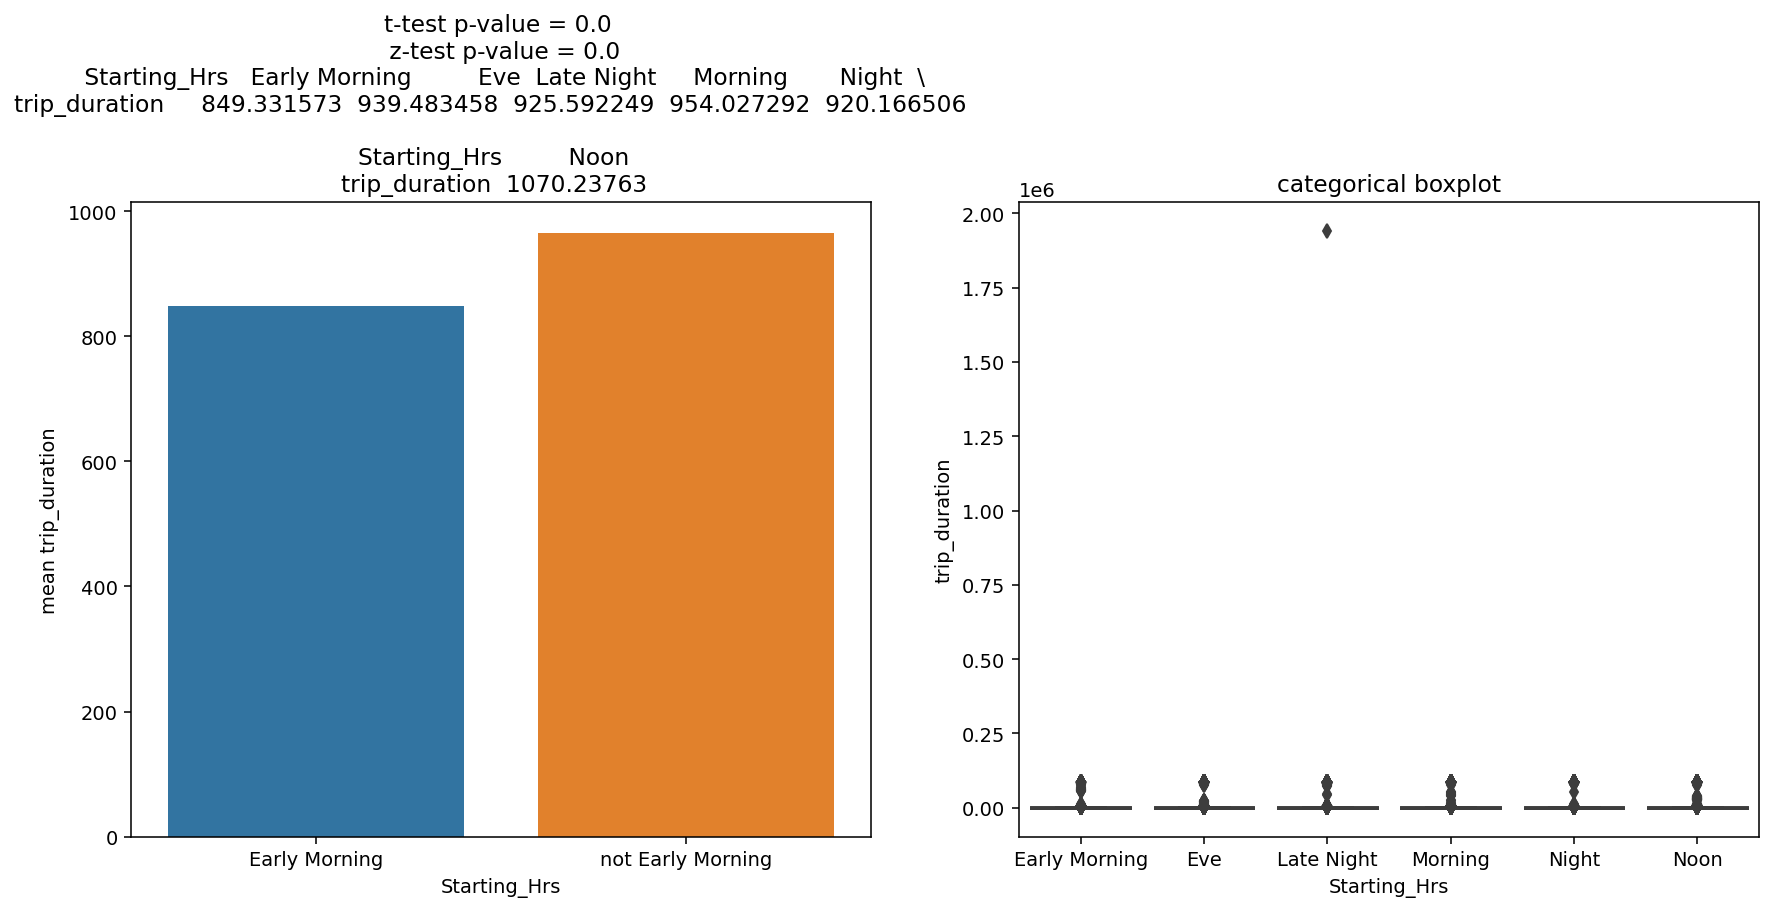

In [146]:
Bivariate_cont_cat(data, 'trip_duration', 'Starting_Hrs','Early Morning' )

**4.Are weekends tend to have less trip duration?**


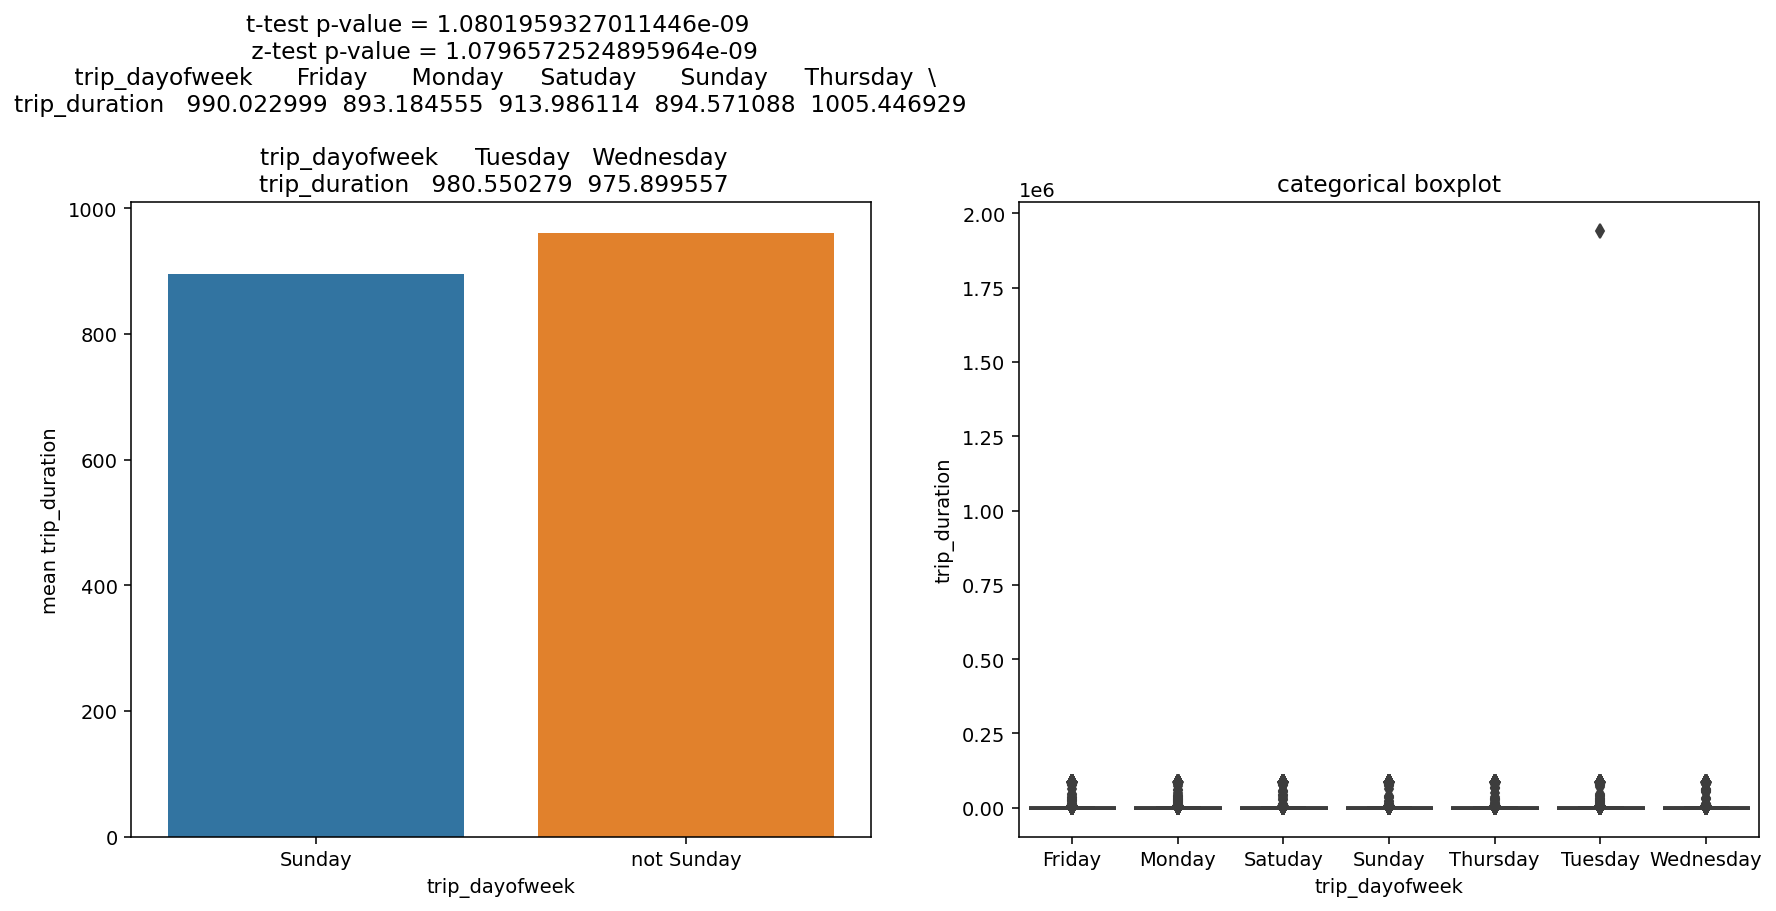

In [147]:
Bivariate_cont_cat(data, 'trip_duration','trip_dayofweek','Sunday')

**5. Who provided more trip durations vendor 1 or 2?**

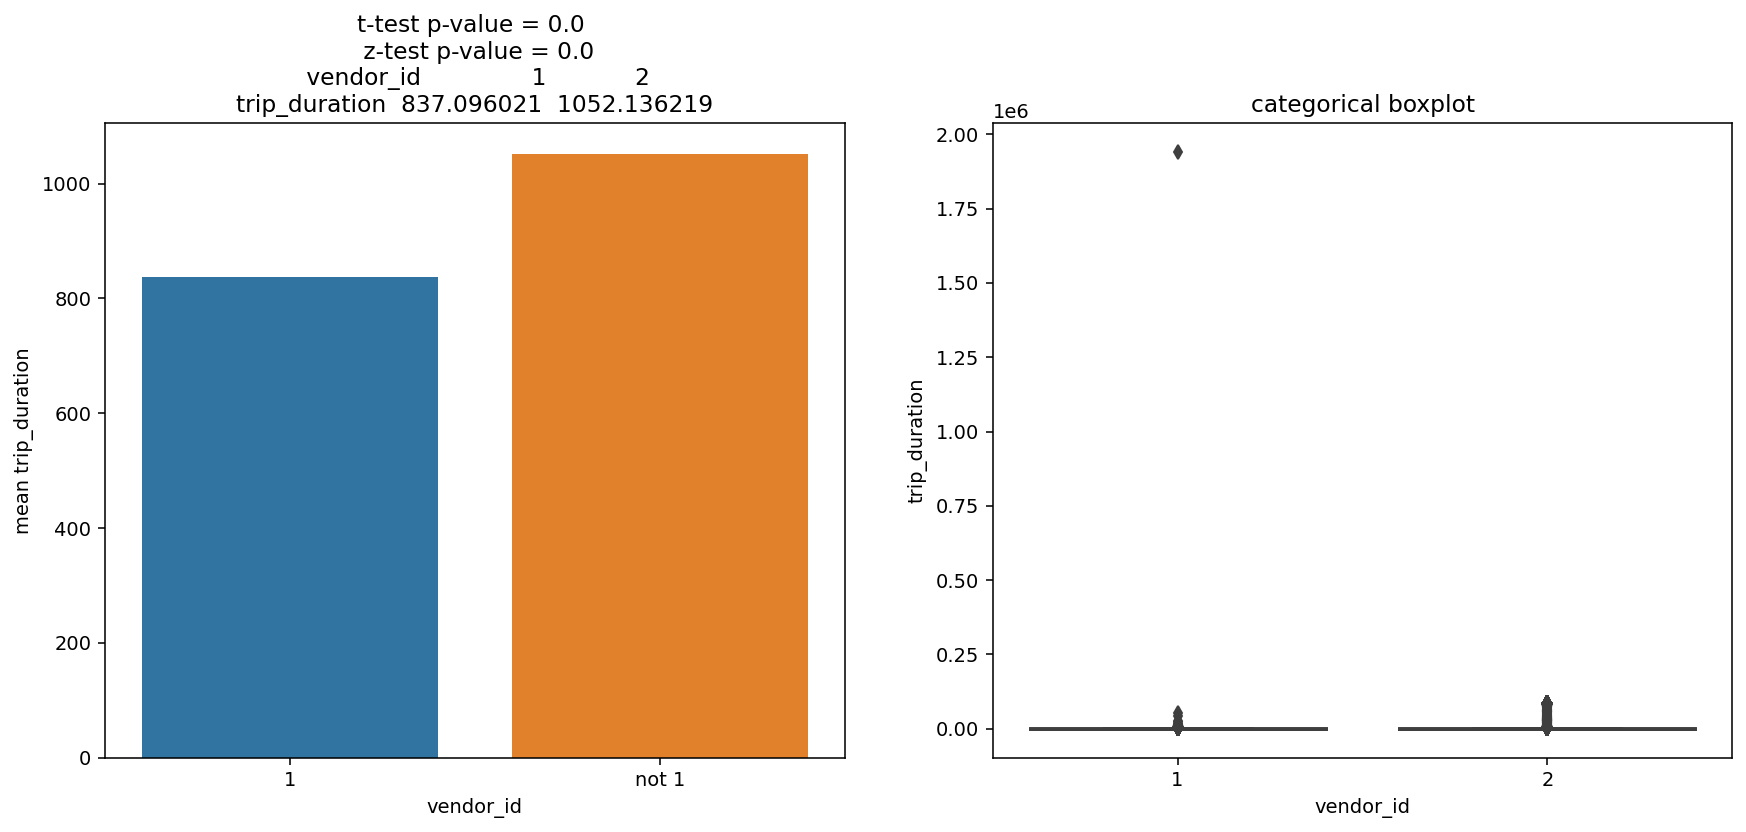

In [149]:
Bivariate_cont_cat(data,'trip_duration','vendor_id',1)

**What was the total distance covered on different days of week?**

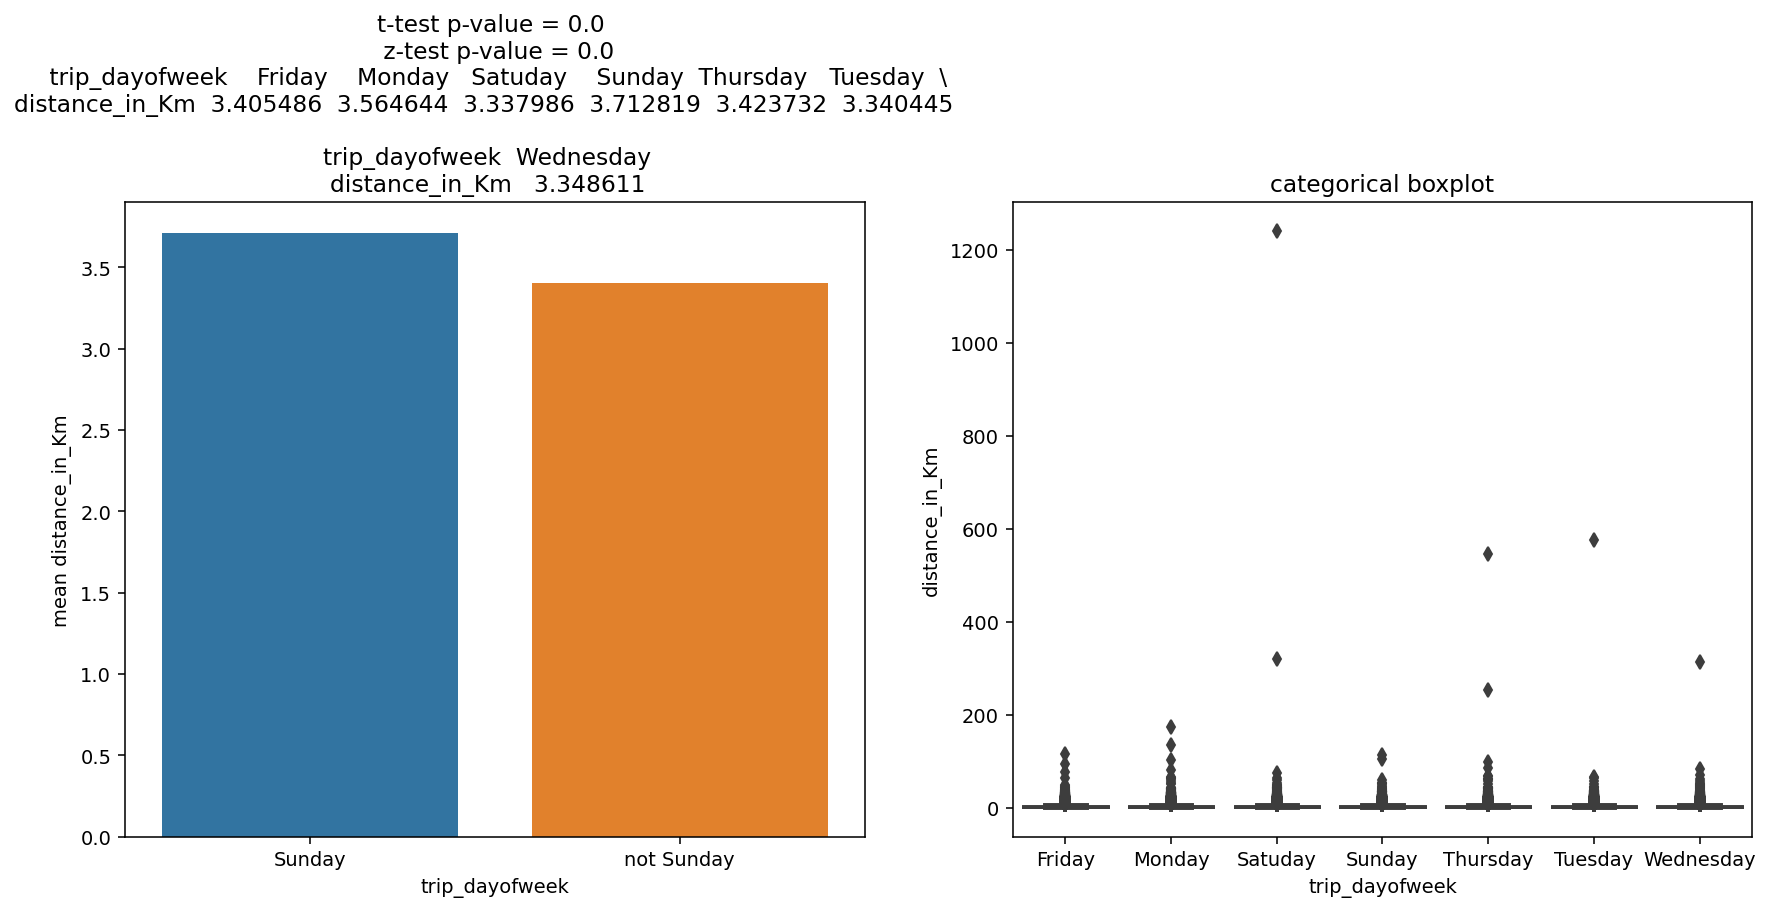

In [156]:
Bivariate_cont_cat(data,'distance_in_Km','trip_dayofweek','Sunday')

# 2.3 Bivariate : Categorical-Categorical


In [150]:
data.dtypes

id                           category
vendor_id                    category
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag           category
trip_duration                   int64
day_start                       int64
day_end                         int64
month_start                     int64
month_end                       int64
date_pickup            datetime64[ns]
date_dropoff           datetime64[ns]
Hour_pickup                     int64
Hour_dropoff                    int64
trip_dayofweek               category
time difference               float64
Starting_Hrs                 category
End_Hrs                      category
distance_in_Km                float64
speed of taxi km/hr           float64
dtype: object

**How many store and forward trip provided by vendors?**

In [151]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

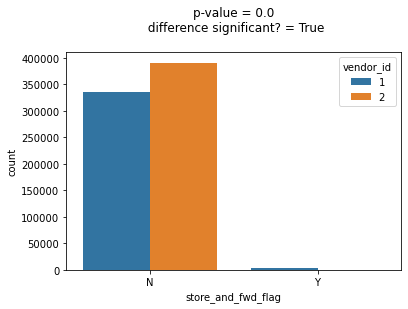

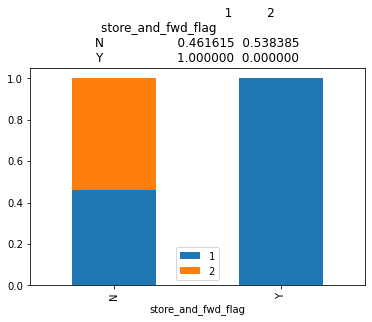

In [152]:
BVA_categorical_plot(data,'vendor_id','store_and_fwd_flag')

**What are the diferent time statring hrs for trips on week days?**

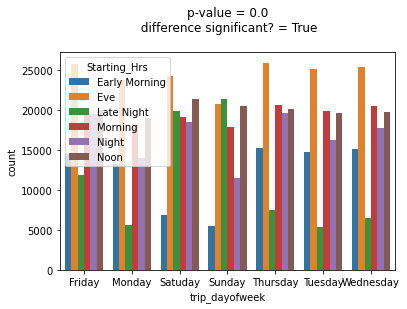

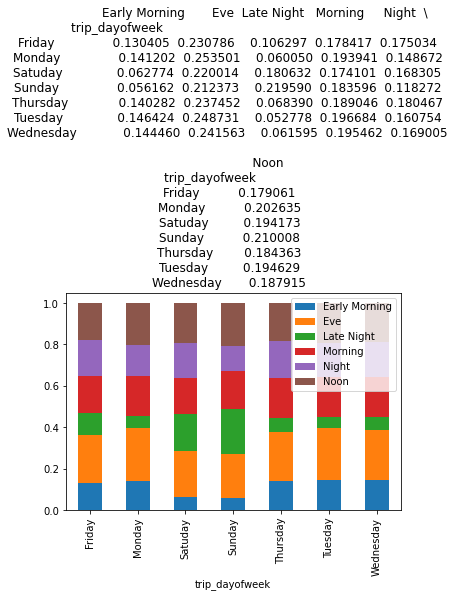

In [154]:
BVA_categorical_plot(data,'Starting_Hrs','trip_dayofweek')

# 4.Multivariate Analysis

**Pivot Table**


In [201]:
data.pivot_table('trip_duration', ['vendor_id','store_and_fwd_flag'], aggfunc='mean')

trip_duration
vendor_id store_and_fwd_flag               
1         N                      833.985642
          Y                     1094.857921
2         N                     1052.136219

In [187]:
data.pivot_table('distance_in_Km', ['trip_dayofweek','passenger_count'], aggfunc='mean')

distance_in_Km
trip_dayofweek passenger_count                
Friday         0                      3.435946
               1                      3.354881
               2                      3.632550
               3                      3.444992
               4                      3.585902
               5                      3.421306
               6                      3.334690
               9                      0.000000
Monday         0                      3.688189
               1                      3.488624
               2                      3.888094
               3                      3.728181
               4                      3.866370
               5                      3.572720
               6                      3.509083
Satuday        0                      2.957713
               1                      3.312119
               2                      3.432829
               3                      3.340765
               4                      3.305279
               5                      3.403104
               6                      3.292480
Sunday         0                      0.005468
               1                      3.675944
               2                      3.862702
               3                      3.701582
               4                      3.670658
               5                      3.778154
               6                      3.679162
Thursday       0                      0.010958
               1                      3.358087
               2                      3.703607
               3                      3.569671
               4                      3.838185
               5                      3.452596
               6                      3.321179
Tuesday        0                      0.002874
               1                      3.266973
               2                      3.650144
               3                      3.556577
               4                      3.552763
               5                      3.398193
               6                      3.299121
               7                      0.002622
Wednesday      0                      4.446779
               1                      3.288896
               2                      3.552749
               3                      3.518769
               4                      3.664874
               5                      3.431056
               6                      3.377311

In [193]:
data.pivot_table('trip_duration', ['Starting_Hrs','passenger_count'], aggfunc='mean')

trip_duration
Starting_Hrs  passenger_count               
Early Morning 0                   818.500000
              1                   821.235107
              2                   892.794789
              3                  1073.210465
              4                   942.779690
              5                   961.377080
              6                   943.796703
              9                   560.000000
Eve           0                   209.800000
              1                   913.410740
              2                   995.879788
              3                   985.981532
              4                  1011.932528
              5                  1015.898085
              6                  1008.366598
Late Night    0                   118.666667
              1                   897.103007
              2                   889.579674
              3                  1008.500000
              4                   908.375361
              5                  1215.957919
              6                  1105.279793
Morning       0                  1500.250000
              1                   929.408113
              2                  1014.223040
              3                   955.785497
              4                  1027.299515
              5                  1064.568675
              6                  1035.363468
              7                    19.000000
Night         0                   103.400000
              1                   897.582782
              2                   932.955667
              3                   945.297567
              4                   969.397171
              5                  1040.213089
              6                  1069.673088
Noon          0                   355.333333
              1                  1021.613356
              2                  1147.201454
              3                  1201.952846
              4                  1137.807078
              5                  1226.858154
              6                  1300.710157

In [221]:
tripd = pd.qcut(data['trip_duration'], 3)
distk = pd.qcut(data['distance_in_Km'], 3)
data.pivot_table('store_and_fwd_flag',['vendor_id', distk], [tripd, 'trip_dayofweek'],  aggfunc='count')

trip_duration              (0.999, 479.0]                                 \
trip_dayofweek                     Friday Monday Satuday Sunday Thursday   
vendor_id distance_in_Km                                                   
1         (-0.001, 1.485]           12560  11384   12578  11468    12189   
          (1.485, 3.055]             3784   3903    5023   5382     3511   
          (3.055, 1240.51]            275    326     345    400      252   
2         (-0.001, 1.485]           14218  12920   14445  13086    13396   
          (1.485, 3.055]             4223   4639    5716   6235     3935   
          (3.055, 1240.51]            269    307     395    501      248   

trip_duration                                (479.0, 906.0]                 \
trip_dayofweek             Tuesday Wednesday         Friday Monday Satuday   
vendor_id distance_in_Km                                                     
1         (-0.001, 1.485]    11515     11709           4402   3004    3242   
          (1.485, 3.055]      3428      3566           9345   7843    9800   
          (3.055, 1240.51]     217       229           3589   3814    4549   
2         (-0.001, 1.485]    13122     12964           5087   3459    3767   
          (1.485, 3.055]      4068      3941          10722   9025   11227   
          (3.055, 1240.51]     271       290           4097   4407    5432   

trip_duration               ...                            (906.0, 1939736.0]  \
trip_dayofweek              ... Thursday Tuesday Wednesday             Friday   
vendor_id distance_in_Km    ...                                                 
1         (-0.001, 1.485]   ...     4504    4106      4369                769   
          (1.485, 3.055]    ...     8936    8253      8511               4184   
          (3.055, 1240.51]  ...     3179    3340      3218              13177   
2         (-0.001, 1.485]   ...     5083    4743      4863                932   
          (1.485, 3.055]    ...    10184    9494      9744               4706   
          (3.055, 1240.51]  ...     3745    3704      3744              15405   

trip_duration                                                                
trip_dayofweek             Monday Satuday Sunday Thursday Tuesday Wednesday  
vendor_id distance_in_Km                                                     
1         (-0.001, 1.485]     428     507    291      929     801       965  
          (1.485, 3.055]     2450    2839   1409     4466    4024      4433  
          (3.055, 1240.51]  10421   12183  10996    13109   11141     12107  
2         (-0.001, 1.485]     626     678    396     1122    1056      1173  
          (1.485, 3.055]     2868    3332   1755     5232    4574      5088  
          (3.055, 1240.51]  12148   14194  12957    15324   13397     14160  

[6 rows x 21 columns]

In [223]:
data.pivot_table('vendor_id',['passenger_count', distk], [tripd, 'trip_dayofweek'],  aggfunc='count')

trip_duration                    (0.999, 479.0]                        \
trip_dayofweek                           Friday Monday Satuday Sunday   
passenger_count distance_in_Km                                          
0               (-0.001, 1.485]               5      3       3     10   
                (1.485, 3.055]                0      0       0      0   
                (3.055, 1240.51]              0      0       0      0   
1               (-0.001, 1.485]           19402  17831   18514  16986   
                (1.485, 3.055]             5744   6292    7402   8002   
                (3.055, 1240.51]            404    482     530    651   
2               (-0.001, 1.485]            3574   3174    4300   3702   
                (1.485, 3.055]             1106   1114    1739   1783   
                (3.055, 1240.51]             62     80     109    128   
3               (-0.001, 1.485]            1024    869    1213   1100   
                (1.485, 3.055]              294    320     488    552   
                (3.055, 1240.51]             22     18      17     30   
4               (-0.001, 1.485]             455    408     624    550   
                (1.485, 3.055]              156    117     203    251   
                (3.055, 1240.51]             11      6      12     17   
5               (-0.001, 1.485]            1415   1244    1424   1379   
                (1.485, 3.055]              465    431     539    628   
                (3.055, 1240.51]             26     27      45     50   
6               (-0.001, 1.485]             903    775     945    827   
                (1.485, 3.055]              242    268     368    401   
                (3.055, 1240.51]             19     20      27     25   
7               (-0.001, 1.485]               0      0       0      0   
                (1.485, 3.055]                0      0       0      0   
                (3.055, 1240.51]              0      0       0      0   
9               (-0.001, 1.485]               0      0       0      0   
                (1.485, 3.055]                0      0       0      0   
                (3.055, 1240.51]              0      0       0      0   

trip_duration                                               (479.0, 906.0]  \
trip_dayofweek                   Thursday Tuesday Wednesday         Friday   
passenger_count distance_in_Km                                               
0               (-0.001, 1.485]         4       1         0              0   
                (1.485, 3.055]          0       0         0              0   
                (3.055, 1240.51]        0       0         0              0   
1               (-0.001, 1.485]     18953   18333     18359           6810   
                (1.485, 3.055]       5447    5549      5614          14251   
                (3.055, 1240.51]      392     373       394           5550   
2               (-0.001, 1.485]      3228    2995      3039           1270   
                (1.485, 3.055]       1001     883       969           2890   
                (3.055, 1240.51]       56      47        56           1056   
3               (-0.001, 1.485]       844     819       802            401   
                (1.485, 3.055]        278     290       226            836   
                (3.055, 1240.51]       11      19        14            322   
4               (-0.001, 1.485]       392     381       400            184   
                (1.485, 3.055]         83     103       118            394   
                (3.055, 1240.51]        0       6        11            121   
5               (-0.001, 1.485]      1322    1309      1307            509   
                (1.485, 3.055]        396     423       351           1043   
                (3.055, 1240.51]       27      30        29            396   
6               (-0.001, 1.485]       842     798       766            314   
                (1.485, 3.055]        241     248       229            653   
               

**Box Plot**

In [224]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')


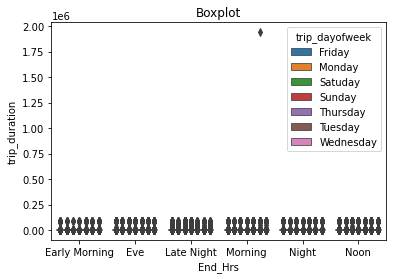

In [228]:
Grouped_Box_Plot(data,'trip_duration', 'End_Hrs', 'trip_dayofweek')

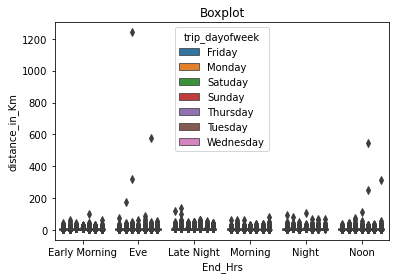

In [230]:
Grouped_Box_Plot(data,'distance_in_Km', 'End_Hrs', 'trip_dayofweek')

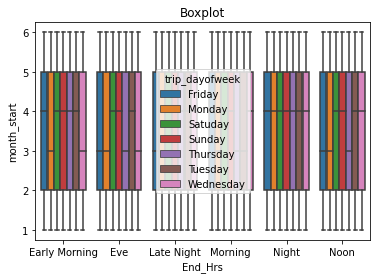

In [232]:
Grouped_Box_Plot(data,'month_start', 'End_Hrs', 'trip_dayofweek')

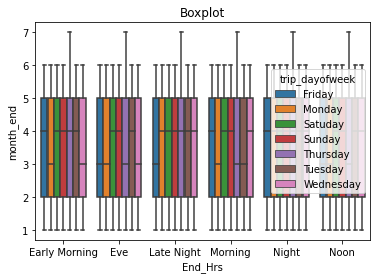

In [233]:
Grouped_Box_Plot(data,'month_end', 'End_Hrs', 'trip_dayofweek')

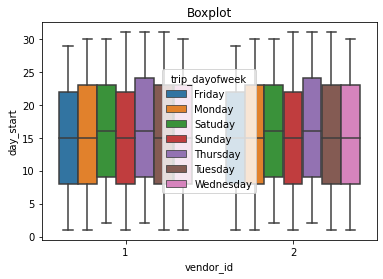

In [237]:
Grouped_Box_Plot(data,'day_start','vendor_id','trip_dayofweek')

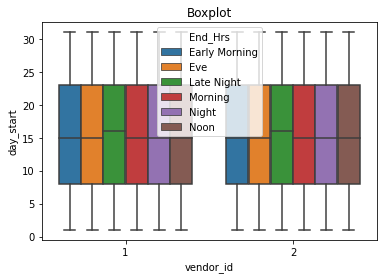

In [238]:
Grouped_Box_Plot(data,'day_start','vendor_id','End_Hrs')

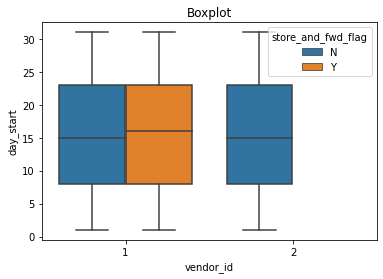

In [239]:
Grouped_Box_Plot(data,'day_start','vendor_id','store_and_fwd_flag')